<a href="https://colab.research.google.com/github/JyzMinaBF/SeoulBikeData_Analysis/blob/main/Seoul_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beginning

In [ ]:
import pandas as pd
import statsmodels.api as sm
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
seoulbike = pd.read_csv("/content/drive/MyDrive/SeoulBikeData.csv", encoding= 'unicode_escape')

In [ ]:
print(seoulbike.head())

         Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   


In [ ]:
#columns with values for avoid
d = {'Seasons':'Winter', 'Holiday':'No Holiday'}
d1 = {k:{v: np.nan} for k, v in d.items()}

In [ ]:
seoulbike_adj = seoulbike[seoulbike["Functioning Day"] != "No"]
seoulbike_adj = seoulbike_adj.drop(["Date","Dew point temperature(°C)"], axis = 1)
season_dummy = pd.get_dummies(seoulbike_adj.replace(d1)["Seasons"])
holiday_dummy = pd.get_dummies(seoulbike_adj.replace(d1)["Holiday"])
seoulbike_adj = seoulbike_adj.drop(["Seasons", "Holiday", "Functioning Day"], axis = 1)
seoulbike_adj = pd.concat([seoulbike_adj, season_dummy, holiday_dummy], axis = 1)

In [ ]:
seoulbike_adj.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

   Autumn  Spring  Summer  Holiday  
0       0       0       0        0  
1       0       0       0        0  
2       0       0       0        0  
3       0       0       0        0  
4       0       0       0        0

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.special import boxcox, inv_boxcox
from scipy import stats

# Regression

In [ ]:
#columns with values for avoid
hour_dummy = pd.get_dummies(seoulbike_adj["Hour"])
seoulbike_adj_hour_changed = pd.concat([hour_dummy, seoulbike_adj.drop("Hour", axis = 1)], axis = 1)
seoulbike_adj_hour_changed.head()

0  1  2  3  4  5  6  7  8  9  ...  Humidity(%)  Wind speed (m/s)  \
0  1  0  0  0  0  0  0  0  0  0  ...           37               2.2   
1  0  1  0  0  0  0  0  0  0  0  ...           38               0.8   
2  0  0  1  0  0  0  0  0  0  0  ...           39               1.0   
3  0  0  0  1  0  0  0  0  0  0  ...           40               0.9   
4  0  0  0  0  1  0  0  0  0  0  ...           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

   Autumn  Spring  Summer  Holiday  
0       0       0       0        0  
1       0       0       0        0  
2       0       0       0        0  
3       0       0       0        0  
4       0       0       0        0  

[5 rows x 36 columns]

In [ ]:
from scipy.stats import shapiro, normaltest
stat, p_value = shapiro(seoulbike_adj["Rented Bike Count"])
print("Shapiro:")
print(p_value)
stat, p_value = normaltest(seoulbike_adj["Rented Bike Count"])
print("D'Agostino:")
print(p_value)

Shapiro:
0.0
D'Agostino:
1.1371885467443365e-291


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
np_norm = np.random.normal(20, 5, 200)
stat, p_value = shapiro(np_norm)
print("Shapiro:")
print(p_value)
stat, p_value = normaltest(np_norm)
print("D'Agostino:")
print(p_value)

Shapiro:
0.6609246134757996
D'Agostino:
0.6458223052835599


In [ ]:
stat, p_value = shapiro(seoulbike_adj["Rented Bike Count"] ** (1/3))
print("Shapiro:")
print(p_value)
stat, p_value = normaltest(seoulbike_adj["Rented Bike Count"] ** (1/3))
print("D'Agostino:")
print(p_value)

Shapiro:
2.2917156557488815e-27
D'Agostino:
5.216159679098643e-153


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro:
1.1322240773534862e-25
D'Agostino:
1.4329676367235544e-106


Text(0, 0.5, 'Frequency')

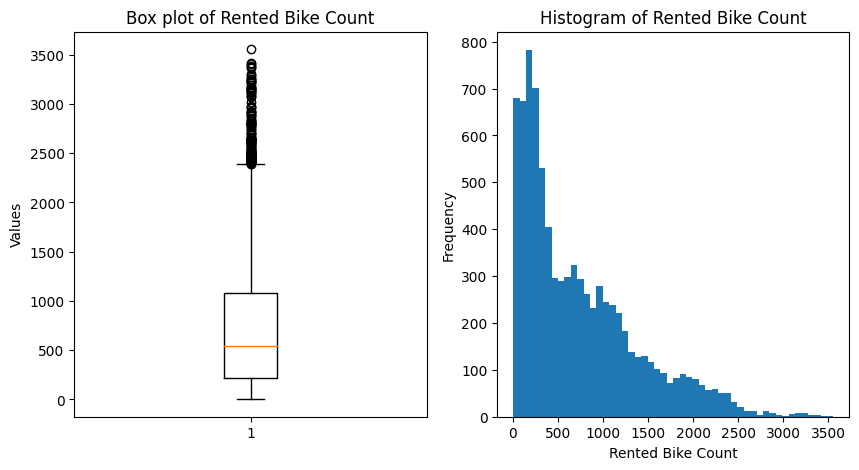

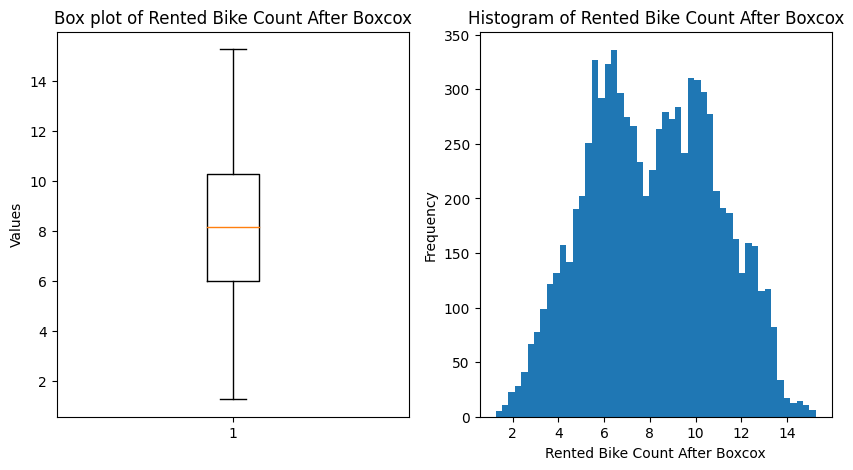

In [ ]:
y = "Rented Bike Count"
data = seoulbike_adj
y_changed, lambda_ = stats.boxcox(data[y] - np.min(data[y]) + 1e-6)
stat, p_value = shapiro(y_changed)
print("Shapiro:")
print(p_value)
stat, p_value = normaltest(y_changed)
print("D'Agostino:")
print(p_value)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Create the boxplot on the second subplot
ax1.boxplot(data[y])
ax1.set_title("Box plot of " + y)
ax1.set_ylabel("Values")

# Create the histogram on the first subplot
ax2.hist(data[y], bins = 50)
ax2.set_title("Histogram of " + y)
ax2.set_xlabel(y)
ax2.set_ylabel("Frequency")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Create the boxplot on the second subplot
ax1.boxplot(seoulbike_adj["Rented Bike Count"] ** (1/3))
ax1.set_title("Box plot of " + "Rented Bike Count After Boxcox")
ax1.set_ylabel("Values")

# Create the histogram on the first subplot
ax2.hist(seoulbike_adj["Rented Bike Count"] ** (1/3), bins = 50)
ax2.set_title("Histogram of " + "Rented Bike Count After Boxcox")
ax2.set_xlabel("Rented Bike Count After Boxcox")
ax2.set_ylabel("Frequency")

In [ ]:
def lm(data, y):

  # create example data
  x = data.drop([y, "Visibility (10m)", "Snowfall (cm)"], axis = 1)
  y_changed = seoulbike_adj["Rented Bike Count"] ** (1/3)
  X_lin = sm.add_constant(x)
  model = sm.OLS(y_changed, X_lin).fit()

  # make predictions on the training data
  y_pred_inv = model.predict(X_lin) ** 3

  # calculate the MSE of the predictions
  mse = mean_squared_error(data[y], y_pred_inv)
  r2 = r2_score(data[y], y_pred_inv)

  # print the MSE values
  print("Linear regression summary:\n", model.summary(), "\n")
  print("Linear Regression MSE:", mse)
  print("Linear Regression R-squared:", r2)

def lm2(data, y):
  from sklearn.linear_model import LinearRegression
  from sklearn.model_selection import cross_val_score, KFold

  x = data.drop([y, "Visibility (10m)", "Snowfall (cm)"], axis = 1).values
  y_changed = seoulbike_adj["Rented Bike Count"] ** (1/3)
  y_changed = y_changed.values

  model = LinearRegression()
  kfold = KFold(n_splits=10, shuffle=True, random_state=42)
  scores = cross_val_score(model, x, y_changed, cv = kfold, scoring = "r2")

  print("R2 for 10 folds:", scores)
  print("Mean of R2 for 10 folds:", scores.mean())

y = "Rented Bike Count"
data = seoulbike_adj_hour_changed
lm(data, y)
lm2(data, y)

Linear regression summary:
                             OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     744.3
Date:                Wed, 17 May 2023   Prob (F-statistic):               0.00
Time:                        15:45:01   Log-Likelihood:                -14991.
No. Observations:                8465   AIC:                         3.005e+04
Df Residuals:                    8432   BIC:                         3.028e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [ ]:
def lm(data, y):
  from sklearn.linear_model import Lasso
  from scipy.special import boxcox, inv_boxcox
  from sklearn.preprocessing import StandardScaler
  from sklearn.pipeline import Pipeline
  from sklearn.model_selection import train_test_split, GridSearchCV

  # create example data
  x = data.drop(y, axis = 1)
  y_changed = seoulbike_adj["Rented Bike Count"] ** (1/3)

  pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
  ])

  search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )
  # create linear regression object

  # fit the model using the training data
  search.fit(x, y_changed)

  # make predictions on the training data
  y_pred = search.predict(x) ** 3

  # calculate the MSE of the predictions
  mse = mean_squared_error(data[y], y_pred)
  r2 = r2_score(data[y], y_pred)
  print(search.best_params_)
  coef = search.best_estimator_.named_steps['model'].coef_
  cols = data.drop(y, axis = 1).columns
  for i in range(len(cols)):
    print(cols[i], ":", coef[i])


  # print the MSE values
  print("Lasso MSE:", mse)
  print("Lasso R-squared:", r2)

  x = data.drop(y, axis = 1).values
  y_changed = seoulbike_adj["Rented Bike Count"] ** (1/3)
  y_changed = y_changed.values

  model = Lasso(0.1)
  kfold = KFold(n_splits=10, shuffle=True, random_state=42)
  scores = cross_val_score(model, x, y_changed, cv = kfold, scoring = "r2")

  print("R2 for 10 folds:", scores)
  print("Mean of R2 for 10 folds:", scores.mean())

data.columns = data.columns.astype(str)
lm(data, y)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END .................model__alpha=0.1;, score=-1.485 total time=   0.0s
[CV 2/5] END .................model__alpha=0.1;, score=-1.854 total time=   0.1s
[CV 3/5] END .................model__alpha=0.1;, score=-4.871 total time=   0.1s
[CV 4/5] END .................model__alpha=0.1;, score=-4.216 total time=   0.1s
[CV 5/5] END .................model__alpha=0.1;, score=-3.530 total time=   0.0s
[CV 1/5] END .................model__alpha=0.2;, score=-1.838 total time=   0.0s
[CV 2/5] END .................model__alpha=0.2;, score=-2.229 total time=   0.0s
[CV 3/5] END .................model__alpha=0.2;, score=-5.622 total time=   0.0s
[CV 4/5] END .................model__alpha=0.2;, score=-4.364 total time=   0.0s
[CV 5/5] END .................model__alpha=0.2;, score=-4.265 total time=   0.0s
[CV 1/5] END .model__alpha=0.30000000000000004;, score=-2.509 total time=   0.0s
[CV 2/5] END .model__alpha=0.30000000000000004;

In [ ]:
def lm(data, y):
  from sklearn.linear_model import Ridge
  from scipy.special import boxcox, inv_boxcox
  from sklearn.preprocessing import StandardScaler
  from sklearn.pipeline import Pipeline
  from sklearn.model_selection import train_test_split, GridSearchCV

  x = data.drop(y, axis = 1)
  y_changed = seoulbike_adj["Rented Bike Count"] ** (1/3)

  pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Ridge())
  ])

  search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )
  # create linear regression object

  # fit the model using the training data
  search.fit(x, y_changed)

  # make predictions on the training data
  y_pred = search.predict(x) ** 3

  # calculate the MSE of the predictions
  mse = mean_squared_error(data[y], y_pred)
  r2 = r2_score(data[y], y_pred)
  print(search.best_params_)
  coef = search.best_estimator_.named_steps['model'].coef_
  cols = data.drop(y, axis = 1).columns
  for i in range(len(cols)):
    print(cols[i], ":", coef[i])

  # print the MSE values
  # print("Ridge RMSE:", np.sqrt(mse1))
  # print("Ridge R-squared:", r2_1)
  print("Ridge MSE:", mse)
  print("Ridge R-squared:", r2)

  x = data.drop([y, "Visibility (10m)", "Snowfall (cm)"], axis = 1).values
  y_changed = seoulbike_adj["Rented Bike Count"] ** (1/3)
  y_changed = y_changed.values

  model = Ridge(9.9)
  kfold = KFold(n_splits=10, shuffle=True, random_state=42)
  scores = cross_val_score(model, x, y_changed, cv = kfold, scoring = "r2")

  print("R2 for 10 folds:", scores)
  print("Mean of R2 for 10 folds:", scores.mean())

lm(data, y)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END .................model__alpha=0.1;, score=-1.552 total time=   0.0s
[CV 2/5] END .................model__alpha=0.1;, score=-2.151 total time=   0.0s
[CV 3/5] END .................model__alpha=0.1;, score=-4.220 total time=   0.0s
[CV 4/5] END .................model__alpha=0.1;, score=-4.142 total time=   0.0s
[CV 5/5] END .................model__alpha=0.1;, score=-1.886 total time=   0.0s
[CV 1/5] END .................model__alpha=0.2;, score=-1.552 total time=   0.0s
[CV 2/5] END .................model__alpha=0.2;, score=-2.150 total time=   0.0s
[CV 3/5] END .................model__alpha=0.2;, score=-4.220 total time=   0.0s
[CV 4/5] END .................model__alpha=0.2;, score=-4.142 total time=   0.0s
[CV 5/5] END .................model__alpha=0.2;, score=-1.886 total time=   0.0s
[CV 1/5] END .model__alpha=0.30000000000000004;, score=-1.551 total time=   0.0s
[CV 2/5] END .model__alpha=0.30000000000000004;

In [ ]:
seoulbike_adj.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8465.000000  8465.000000      8465.000000  8465.000000   
mean          729.156999    11.507029        12.771057    58.147194   
std           642.351166     6.920899        12.104375    20.484839   
min             2.000000     0.000000       -17.800000     0.000000   
25%           214.000000     6.000000         3.000000    42.000000   
50%           542.000000    12.000000        13.500000    57.000000   
75%          1084.000000    18.000000        22.700000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Solar Radiation (MJ/m2)  \
count       8465.000000       8465.000000              8465.000000   
mean           1.725883       1433.873479                 0.567868   
std            1.034281        609.051229                 0.868245   
min            0.000000         27.000000                 0.000000   
25%            0.900000        935.000000                 0.000000   
50%            1.500000       1690.000000                 0.010000   
75%            2.300000       2000.000000                 0.930000   
max            7.400000       2000.000000                 3.520000   

       Rainfall(mm)  Snowfall (cm)       Autumn       Spring       Summer  \
count    8465.00000    8465.000000  8465.000000  8465.000000  8465.000000   
mean        0.14912       0.077685     0.228825     0.255168     0.260839   
std         1.12554       0.444063     0.420101     0.435982     0.439118   
min         0.00000       0.000000     0.000000     0.000000     0.000000   
25%         0.00000       0.000000     0.000000     0.000000     0.000000   
50%         0.00000       0.000000     0.000000     0.000000     0.000000   
75%         0.00000       0.000000     0.000000     1.000000     1.000000   
max        35.00000       8.800000     1.000000     1.000000     1.000000   

           Holiday  
count  8465.000000  
mean      0.048198  
std       0.214198  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [ ]:
seoulbike_adj_test = seoulbike_adj.copy()

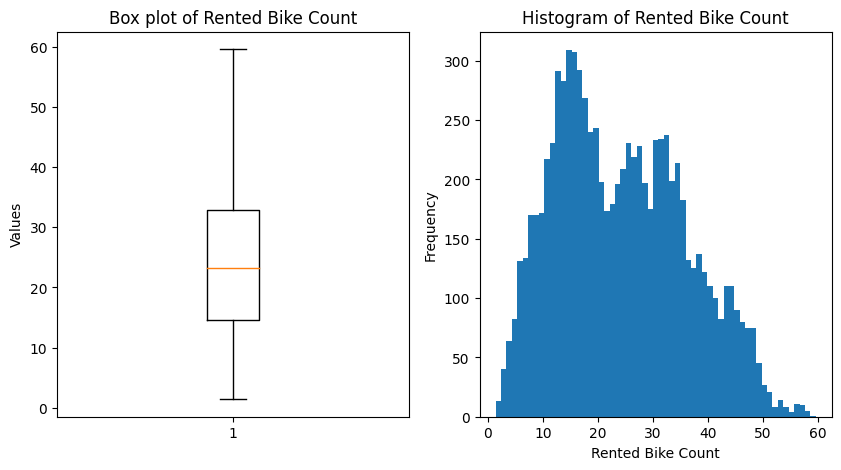

In [ ]:
numerical_cols = ['Rented Bike Count']
seoulbike_adj_test['Rented Bike Count'] = seoulbike_adj['Rented Bike Count'] ** (1/2)
for i in numerical_cols:
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
  column_to_plot = i

  # Create the boxplot on the second subplot
  ax1.boxplot(seoulbike_adj_test[column_to_plot])
  ax1.set_title("Box plot of " + column_to_plot)
  ax1.set_ylabel("Values")

  # Create the histogram on the first subplot
  if max(seoulbike_adj_test[i])-min(seoulbike_adj_test[i]) > 1000:
    ax2.hist(seoulbike_adj_test[column_to_plot], bins=int((max(seoulbike_adj_test[i])-min(seoulbike_adj_test[i])+1)/30))
  else:
    ax2.hist(seoulbike_adj_test[column_to_plot], bins=int((max(seoulbike_adj_test[i])-min(seoulbike_adj_test[i])+1)))
  ax2.set_title("Histogram of " + column_to_plot)
  ax2.set_xlabel(column_to_plot)
  ax2.set_ylabel("Frequency")

# GLM with Poisson

In [ ]:
y = seoulbike_adj_hour_changed["Rented Bike Count"]
X = seoulbike_adj_hour_changed.drop(["Rented Bike Count"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
glm_possion_model = sm.GLM(y_train, X_train,
                    family=sm.families.Poisson())
model = glm_possion_model.fit()
print(model.summary())
poisson_prediction = model.predict(X_test)
mse = mean_squared_error(y_test, poisson_prediction)
r2 = r2_score(y_test, poisson_prediction)
print("GLM MSE:", mse)
print("GLM R-squared:", r2)

                 Generalized Linear Model Regression Results                  
Dep. Variable:      Rented Bike Count   No. Observations:                 7618
Model:                            GLM   Df Residuals:                     7583
Model Family:                 Poisson   Df Model:                           34
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -4.8579e+05
Date:                Mon, 22 May 2023   Deviance:                   9.1123e+05
Time:                        08:25:57   Pearson chi2:                 1.51e+10
No. Iterations:                     8   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
0                         

In [ ]:
mses =[]
for j in range(5, 6):
  seoulbike_adj_hour_changed_ts = seoulbike_adj_hour_changed.copy()
  for i in range(1, j):
    seoulbike_adj_hour_changed_ts["Rented Bike Count_lag" + str(i)] = seoulbike_adj_hour_changed["Rented Bike Count"].shift(i)
  y = seoulbike_adj_hour_changed_ts["Rented Bike Count"][i:]
  X = seoulbike_adj_hour_changed_ts.drop(["Rented Bike Count", "Visibility (10m)"], axis = 1)[i:]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
  glm_possion_model = sm.GLM(y_train, X_train,
                      family=sm.families.Poisson())
  model = glm_possion_model.fit()
  print(model.summary())
  poisson_prediction = model.predict(X_test)
  mse = mean_squared_error(y_test, poisson_prediction)
  mses.append(mse)
  r2 = r2_score(y_test, poisson_prediction)
  print("GLM MSE:", mse)
  print("GLM R-squared:", r2)

                 Generalized Linear Model Regression Results                  
Dep. Variable:      Rented Bike Count   No. Observations:                 7614
Model:                            GLM   Df Residuals:                     7576
Model Family:                 Poisson   Df Model:                           37
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.4387e+05
Date:                Tue, 23 May 2023   Deviance:                   4.2736e+05
Time:                        20:01:08   Pearson chi2:                 1.82e+06
No. Iterations:                     7   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
0                         

In [ ]:
print(mses)

[91879.23898791849, 39619.148319521475, 37541.998804518065, 35656.90042314523, 32904.325199453415, 34035.98584727295, 50638.8434181455, 49080.45091499041, 39810.27737024453, 37185.25055741196, 35642.308570191424, 37280.599877409586, 34106.912478480364, 41599.8003959447, 34051.49303959652, 38343.94733793799, 35495.10306078037, 37163.41402087228, 37091.79731378169, 37332.9879159012, 32336.710162235442, 37459.001591094086, 34186.705093831224, 33175.92478704172]


Text(0, 0.5, 'MSE')

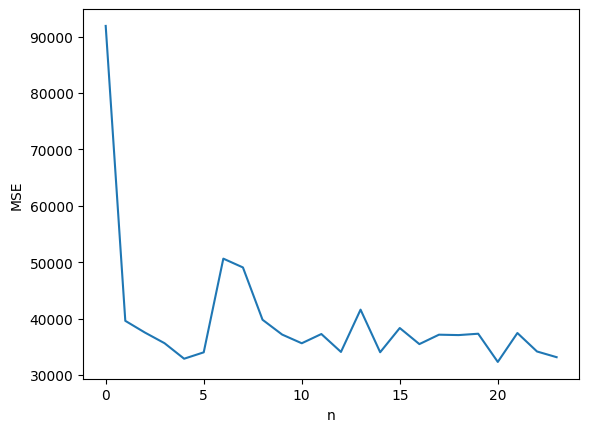

In [ ]:
plt.plot(mses)
plt.xlabel('n')
plt.ylabel('MSE')

In [ ]:
for j in range(4, 5):
  seoulbike_adj_hour_changed_ts = seoulbike_adj_hour_changed.copy()
  for i in range(1, j):
    seoulbike_adj_hour_changed_ts["Rented Bike Count_lag" + str(i)] = seoulbike_adj_hour_changed["Rented Bike Count"].shift(i)
  y = seoulbike_adj_hour_changed_ts["Rented Bike Count"][i:]
  X = seoulbike_adj_hour_changed_ts.drop(["Rented Bike Count", "Visibility (10m)"], axis = 1)[i:]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

  import lightgbm as lgb

  params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'mse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
  }

  train_data = lgb.Dataset(X_train, label=y_train)

  model = lgb.train(params, train_data, 100)
  y_pred = model.predict(X_test)

  # calculate the MSE of the predictions
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  # print the MSE values
  print("LightGBM RMSE:", np.sqrt(mse))
  print("LightGBM R-squared:", r2)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.054044 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1545
[LightGBM] [Info] Number of data points in the train set: 7615, number of used features: 37
[LightGBM] [Info] Start training from score 729.978332
LightGBM RMSE: 105.47006904310642
LightGBM R-squared: 0.9725715659745235


# ARIMA

In [ ]:
model = sm.tsa.arima.ARIMA(seoulbike_adj['Rented Bike Count'][:7800], order=(3, 1, 2))

# Fit the model to the training data
result = model.fit()
print(result.summary())

predictions = result.predict(start = 0, exog = None)
mse = mean_squared_error(seoulbike_adj['Rented Bike Count'][:7800], predictions)
r2 = r2_score(seoulbike_adj['Rented Bike Count'][:7800], predictions)
print("ARIMA MSE:", mse)
print("ARIMA R-squared:", r2)

predictions = result.forecast(665, signal_only= True)
print(predictions[:10])
print(seoulbike_adj['Rented Bike Count'][8000:8010])
mse = mean_squared_error(seoulbike_adj['Rented Bike Count'][7800:], predictions)
r2 = r2_score(seoulbike_adj['Rented Bike Count'][7800:], predictions)
print("ARIMA MSE:", mse)
print("ARIMA R-squared:", r2)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                 7800
Model:                 ARIMA(3, 1, 2)   Log Likelihood              -54461.982
Date:                Wed, 17 May 2023   AIC                         108935.964
Time:                        16:21:35   BIC                         108977.734
Sample:                             0   HQIC                        108950.279
                               - 7800                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2298      0.007    -31.836      0.000      -0.244      -0.216
ar.L2         -0.8505      0.004   -229.876      0.000      -0.858      -0.843
ar.L3          0.2876      0.007     39.344      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


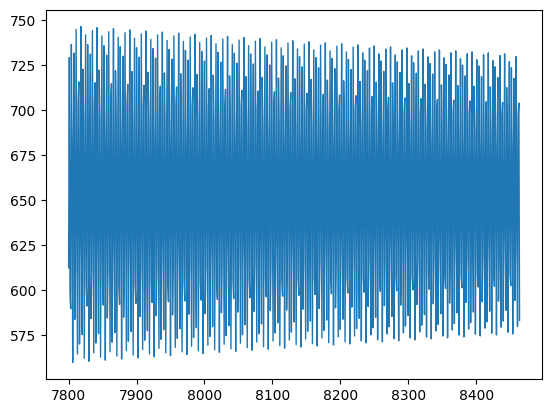

In [ ]:
# plt.plot(seoulbike_adj['Rented Bike Count'][8000:], linewidth = 1)
plt.plot(predictions, linewidth = 1);

# ARMAX

In [ ]:
grouped_data = seoulbike_adj.groupby('Hour')
# for i in range(24):
#   gr = grouped_data.get_group(i)
#   gr_rbc = list(gr["Rented Bike Count"])
#   plt.bar(range(len(gr_rbc)), gr_rbc)
#   plt.show()

In [ ]:
gr_df = grouped_data.get_group(0)

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(seoulbike_adj["Rented Bike Count"].diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -20.257072
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


<Axes: >

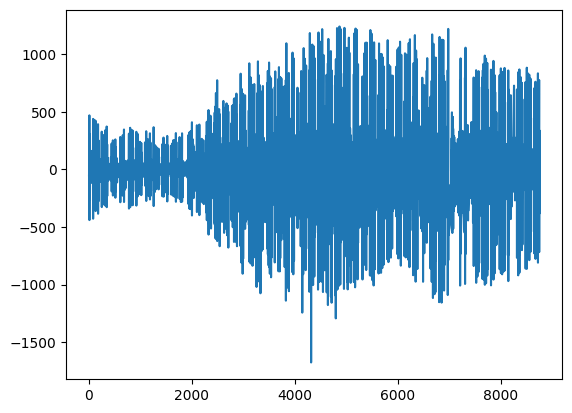

In [ ]:
seoulbike_adj["Rented Bike Count"].diff().dropna().plot()

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


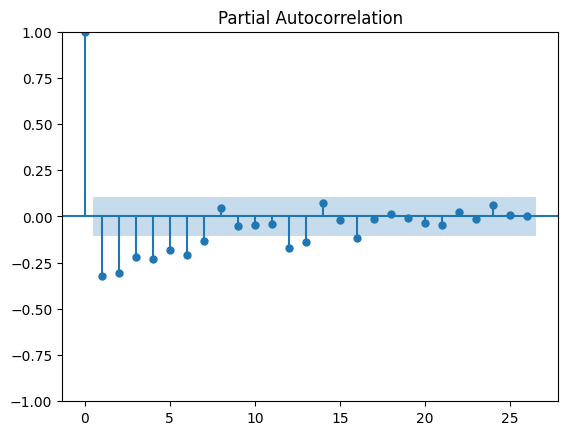

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
plot_pacf(gr_df["Rented Bike Count"].diff().dropna());

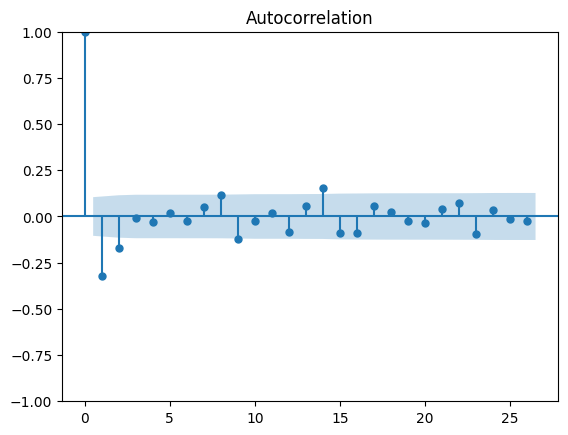

In [ ]:
plot_acf(gr_df["Rented Bike Count"].diff().dropna());

In [ ]:
exog_v = seoulbike_adj_hour_changed.drop(['Rented Bike Count', 'Rainfall(mm)', 'Snowfall (cm)', 'Autumn', 'Spring', 'Summer',
       'Holiday'
       ], axis = 1)
model = sm.tsa.arima.ARIMA(seoulbike_adj_hour_changed['Rented Bike Count'][:8000], exog = exog_v[:8000], order=(3, 1, 2), trend = "n")

# Fit the model to the training data
result = model.fit()
print(result.summary())
predictions = result.predict(start = 0, exog = exog_v[:8000])
mse = mean_squared_error(seoulbike_adj_hour_changed['Rented Bike Count'][:8000], predictions)
r2 = r2_score(seoulbike_adj_hour_changed['Rented Bike Count'][:8000], predictions)
print("ARIMA MSE:", mse)
print("ARIMA R-squared:", r2)

predictions = result.forecast(465, exog = exog_v[8000:])
mse = mean_squared_error(seoulbike_adj_hour_changed['Rented Bike Count'][8000:], predictions)
r2 = r2_score(seoulbike_adj_hour_changed['Rented Bike Count'][8000:], predictions)
print("ARIMA MSE:", mse)
print("ARIMA R-squared:", r2)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                 8000
Model:                 ARIMA(3, 1, 2)   Log Likelihood              -53263.177
Date:                Tue, 23 May 2023   AIC                         106596.355
Time:                        06:15:35   BIC                         106840.902
Sample:                             0   HQIC                        106680.060
                               - 8000                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
0                        -114.7006     29.035     -3.950      0.000    -171.609     -57.792
1                        -216.2859     30.888     -7.002      0.000    -276.826    -155.746


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


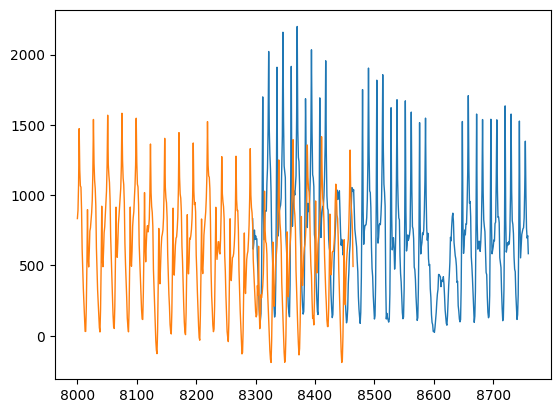

In [ ]:
plt.plot(seoulbike_adj_hour_changed['Rented Bike Count'][8000:], linewidth = 1)
plt.plot(predictions, linewidth = 1);

In [ ]:
print(seoulbike_adj.columns)

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Autumn', 'Spring', 'Summer', 'Winter',
       'Holiday', 'No Holiday'],
      dtype='object')


In [ ]:
exog_v = seoulbike_adj[['Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       ]]
model = sm.tsa.arima.ARIMA(seoulbike_adj['Rented Bike Count'][:8000], exog = exog_v[:8000], order=(3, 1, 2), trend = "n")

# Fit the model to the training data
result = model.fit()
print(result.summary())
predictions = result.predict(start = 0, exog = exog_v[:8000])
mse = mean_squared_error(seoulbike_adj['Rented Bike Count'][:8000], predictions)
r2 = r2_score(seoulbike_adj['Rented Bike Count'][:8000], predictions)
print("ARIMA MSE:", mse)
print("ARIMA R-squared:", r2)

predictions = result.forecast(465, exog = exog_v[8000:])
mse = mean_squared_error(seoulbike_adj['Rented Bike Count'][8000:], predictions)
r2 = r2_score(seoulbike_adj['Rented Bike Count'][8000:], predictions)
print("ARIMA MSE:", mse)
print("ARIMA R-squared:", r2)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                 8000
Model:                 ARIMA(3, 2, 2)   Log Likelihood              -55995.441
Date:                Sun, 21 May 2023   AIC                         112012.882
Time:                        15:19:42   BIC                         112089.738
Sample:                             0   HQIC                        112039.189
                               - 8000                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Temperature(°C)             4.2649      4.959      0.860      0.390      -5.454      13.984
Humidity(%)                -3.0827      0.562     -5.490      0.000      -4.183      -1.982


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
models = list()

for i in range(24):

  gr_df = grouped_data.get_group(i)
  exog_v = gr_df[['Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Autumn', 'Spring', 'Summer', 'Winter',
       'Holiday', 'No Holiday']]

  # Create the ARMAX model
  model = sm.tsa.arima.ARIMA(gr_df['Rented Bike Count'],
                             exog = exog_v,
                             order=(2, 1, 2))

  # Fit the model to the training data
  results = model.fit()

  models.append(results)

  # Print the model summary
  print(results.summary())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warni

                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                  352
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2289.934
Date:                Wed, 26 Apr 2023   AIC                           4615.869
Time:                        16:16:28   BIC                           4685.363
Sample:                             0   HQIC                          4643.527
                                - 352                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Temperature(°C)            17.5262      3.630      4.828      0.000      10.412      24.641
Humidity(%)                -4.1400      0.829     -4.992      0.000      -5.766      -2.514


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting 

                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                  352
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2270.097
Date:                Wed, 26 Apr 2023   AIC                           4576.193
Time:                        16:16:29   BIC                           4645.687
Sample:                             0   HQIC                          4603.851
                                - 352                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Temperature(°C)            10.4215      3.075      3.390      0.001       4.395      16.448
Humidity(%)                -2.6476      0.741     -3.572      0.000      -4.100      -1.195


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting 

                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                  352
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2202.959
Date:                Wed, 26 Apr 2023   AIC                           4441.918
Time:                        16:16:31   BIC                           4511.412
Sample:                             0   HQIC                          4469.576
                                - 352                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Temperature(°C)             4.9355      2.548      1.937      0.053      -0.058       9.929
Humidity(%)                -1.2654      0.628     -2.014      0.044      -2.497      -0.034


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting 

                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                  352
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2050.651
Date:                Wed, 26 Apr 2023   AIC                           4137.303
Time:                        16:16:32   BIC                           4206.797
Sample:                             0   HQIC                          4164.961
                                - 352                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Temperature(°C)             4.5890      1.445      3.175      0.001       1.756       7.422
Humidity(%)                -0.6928      0.365     -1.900      0.057      -1.407       0.022


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                  352
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1883.626
Date:                Wed, 26 Apr 2023   AIC                           3803.252
Time:                        16:16:34   BIC                           3872.746
Sample:                             0   HQIC                          3830.910
                                - 352                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Temperature(°C)             1.5562      1.086      1.433      0.152      -0.573       3.685
Humidity(%)                -0.6031      0.218     -2.761      0.006      -1.031      -0.175


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                  352
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1844.183
Date:                Wed, 26 Apr 2023   AIC                           3724.365
Time:                        16:16:35   BIC                           3793.859
Sample:                             0   HQIC                          3752.023
                                - 352                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Temperature(°C)             1.0833      1.092      0.992      0.321      -1.056       3.223
Humidity(%)                -0.5676      0.219     -2.586      0.010      -0.998      -0.137


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                  352
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2227.540
Date:                Wed, 26 Apr 2023   AIC                           4491.080
Time:                        16:16:37   BIC                           4560.574
Sample:                             0   HQIC                          4518.738
                                - 352                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Temperature(°C)             6.4566      2.477      2.607      0.009       1.603      11.310
Humidity(%)                -0.7645      0.745     -1.026      0.305      -2.225       0.696


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warni

                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                  353
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2560.279
Date:                Wed, 26 Apr 2023   AIC                           5156.557
Time:                        16:16:41   BIC                           5226.103
Sample:                             0   HQIC                          5184.233
                                - 353                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Temperature(°C)             1.0016      7.111      0.141      0.888     -12.936      14.939
Humidity(%)                 0.4510      1.717      0.263      0.793      -2.913       3.815


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.


                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                  353
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2727.113
Date:                Wed, 26 Apr 2023   AIC                           5490.226
Time:                        16:16:43   BIC                           5559.771
Sample:                             0   HQIC                          5517.901
                                - 353                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Temperature(°C)            11.0201     11.134      0.990      0.322     -10.803      32.843
Humidity(%)                -4.9041      3.386     -1.448      0.148     -11.541       1.733


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting 

                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                  353
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2374.276
Date:                Wed, 26 Apr 2023   AIC                           4784.552
Time:                        16:16:44   BIC                           4854.097
Sample:                             0   HQIC                          4812.228
                                - 353                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Temperature(°C)            16.3075      4.501      3.623      0.000       7.485      25.130
Humidity(%)                -3.1835      1.141     -2.791      0.005      -5.419      -0.948


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting 

                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                  353
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2236.018
Date:                Wed, 26 Apr 2023   AIC                           4508.036
Time:                        16:16:46   BIC                           4577.582
Sample:                             0   HQIC                          4535.712
                                - 353                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Temperature(°C)            14.0486      3.108      4.520      0.000       7.956      20.141
Humidity(%)                -2.9134      0.753     -3.872      0.000      -4.388      -1.439


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting 

                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                  353
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2284.687
Date:                Wed, 26 Apr 2023   AIC                           4605.373
Time:                        16:16:47   BIC                           4674.919
Sample:                             0   HQIC                          4633.049
                                - 353                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Temperature(°C)            16.5367      3.478      4.755      0.000       9.720      23.354
Humidity(%)                -4.5511      0.986     -4.614      0.000      -6.485      -2.618


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting 

                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                  353
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2361.999
Date:                Wed, 26 Apr 2023   AIC                           4759.999
Time:                        16:16:49   BIC                           4829.544
Sample:                             0   HQIC                          4787.674
                                - 353                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Temperature(°C)            25.4029      4.303      5.904      0.000      16.970      33.836
Humidity(%)                -6.5959      1.214     -5.434      0.000      -8.975      -4.217


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                  353
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2411.854
Date:                Wed, 26 Apr 2023   AIC                           4859.707
Time:                        16:16:50   BIC                           4929.253
Sample:                             0   HQIC                          4887.383
                                - 353                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Temperature(°C)            26.7500      5.165      5.179      0.000      16.626      36.874
Humidity(%)                -8.5090      1.513     -5.624      0.000     -11.475      -5.543


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                  353
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2446.401
Date:                Wed, 26 Apr 2023   AIC                           4928.802
Time:                        16:16:53   BIC                           4998.347
Sample:                             0   HQIC                          4956.478
                                - 353                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Temperature(°C)            18.2546      6.093      2.996      0.003       6.312      30.198
Humidity(%)                -6.0919      1.456     -4.185      0.000      -8.945      -3.239


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                  353
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2495.756
Date:                Wed, 26 Apr 2023   AIC                           5027.512
Time:                        16:16:58   BIC                           5097.057
Sample:                             0   HQIC                          5055.187
                                - 353                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Temperature(°C)            24.3141      6.470      3.758      0.000      11.633      36.996
Humidity(%)                -6.4441      1.624     -3.968      0.000      -9.627      -3.261


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self.

                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                  353
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2493.783
Date:                Wed, 26 Apr 2023   AIC                           5023.566
Time:                        16:17:01   BIC                           5093.111
Sample:                             0   HQIC                          5051.242
                                - 353                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Temperature(°C)            22.9114      6.914      3.314      0.001       9.361      36.462
Humidity(%)                -7.9775      1.584     -5.037      0.000     -11.082      -4.873


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                  353
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2496.525
Date:                Wed, 26 Apr 2023   AIC                           5029.050
Time:                        16:17:05   BIC                           5098.595
Sample:                             0   HQIC                          5056.726
                                - 353                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Temperature(°C)            33.9140      6.472      5.240      0.000      21.229      46.599
Humidity(%)                -9.2798      1.574     -5.896      0.000     -12.364      -6.195


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zero

                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                  353
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2715.399
Date:                Wed, 26 Apr 2023   AIC                           5466.798
Time:                        16:17:11   BIC                           5536.343
Sample:                             0   HQIC                          5494.474
                                - 353                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Temperature(°C)            42.1912     10.497      4.020      0.000      21.618      62.764
Humidity(%)               -11.3336      2.523     -4.492      0.000     -16.279      -6.389


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupp

                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                  353
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2587.442
Date:                Wed, 26 Apr 2023   AIC                           5210.883
Time:                        16:17:15   BIC                           5280.428
Sample:                             0   HQIC                          5238.559
                                - 353                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Temperature(°C)            28.3058      7.699      3.676      0.000      13.215      43.396
Humidity(%)                -8.9483      1.751     -5.111      0.000     -12.380      -5.517


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                  353
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2545.586
Date:                Wed, 26 Apr 2023   AIC                           5127.172
Time:                        16:17:18   BIC                           5196.718
Sample:                             0   HQIC                          5154.848
                                - 353                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Temperature(°C)            35.0480      6.293      5.570      0.000      22.715      47.381
Humidity(%)               -11.4003      1.491     -7.648      0.000     -14.322      -8.479


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self.

                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                  353
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2578.307
Date:                Wed, 26 Apr 2023   AIC                           5192.614
Time:                        16:17:24   BIC                           5262.159
Sample:                             0   HQIC                          5220.290
                                - 353                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Temperature(°C)            38.9011      7.954      4.891      0.000      23.312      54.490
Humidity(%)               -10.6290      1.716     -6.193      0.000     -13.993      -7.265


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self.

                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                  353
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2501.745
Date:                Wed, 26 Apr 2023   AIC                           5039.491
Time:                        16:17:29   BIC                           5109.036
Sample:                             0   HQIC                          5067.167
                                - 353                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Temperature(°C)            24.8173      6.696      3.706      0.000      11.693      37.942
Humidity(%)                -9.8096      1.236     -7.939      0.000     -12.231      -7.388


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                  353
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2359.871
Date:                Wed, 26 Apr 2023   AIC                           4755.742
Time:                        16:17:32   BIC                           4825.287
Sample:                             0   HQIC                          4783.417
                                - 353                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Temperature(°C)            19.6130      3.962      4.951      0.000      11.848      27.378
Humidity(%)                -5.6125      0.934     -6.008      0.000      -7.443      -3.782


In [ ]:
mses = list()
sses = 0
for i in range(24):
  gr_df = grouped_data.get_group(i)
  exog_v = gr_df[['Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Autumn', 'Spring', 'Summer', 'Winter',
       'Holiday', 'No Holiday']]
  predictions = models[i].predict(start = 0, exog=exog_v)
  sse = ((gr_df['Rented Bike Count'] - predictions) ** 2).sum()
  sses += sse
  mses.append(sse/len(gr_df.index))

print(f'Mean squared error: {mses}')

Mean squared error: [28554.12866656641, 24621.719180592107, 12542.332523501645, 5204.684480809753, 2237.0695330679823, 2322.6116766279297, 16368.296065810753, 100216.9818947907, 248041.44852915246, 38131.25631183831, 19545.243350296278, 27141.6472315868, 39558.385767682164, 52990.981030921466, 62848.25653222355, 81536.52894588097, 83860.822168462, 86374.77960550103, 288400.47395033576, 144780.31939195746, 112348.79430693321, 129084.90452867185, 81064.41919860772, 40767.06438994488]


AttributeError: ignored

In [ ]:
print(sum(mses)/24)

72022.63121924012


# ARMAX_specific

In [ ]:
models = dict()
exog_vs = dict()

## Hour 0

ADF Statistic: -8.738211
p-value: 0.000000
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


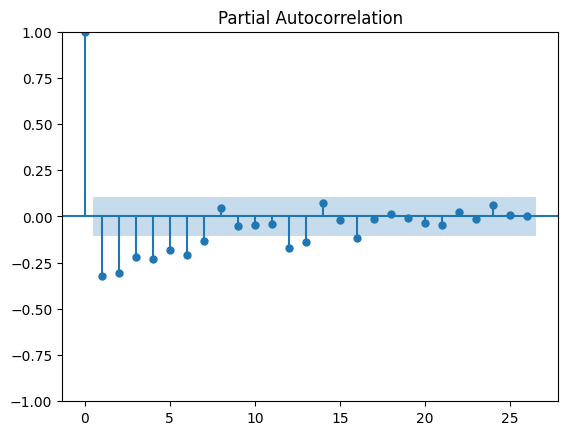

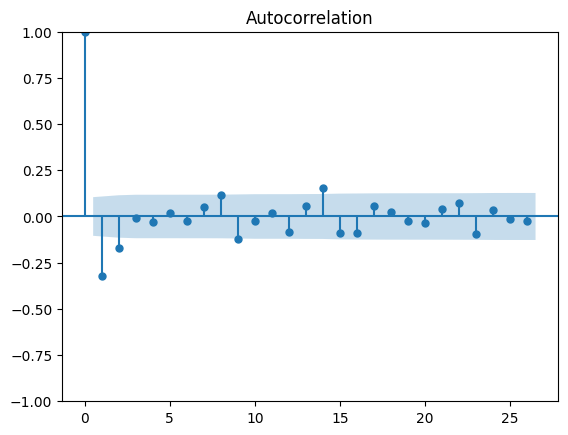

In [ ]:
h = 0
gr_df = grouped_data.get_group(h)
result = adfuller(gr_df["Rented Bike Count"].diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))
plot_pacf(gr_df["Rented Bike Count"].diff().dropna());
plot_acf(gr_df["Rented Bike Count"].diff().dropna());

In [ ]:
exog_v_choice = ['Temperature(°C)', 'Humidity(%)',
       'Rainfall(mm)']
exog_vs[h] = exog_v_choice
exog_v = gr_df[exog_v_choice]

# Create the ARMAX model
model = sm.tsa.arima.ARIMA(gr_df['Rented Bike Count'],
                            exog = exog_v,
                            order=(2, 1, 1))

# Fit the model to the training data
results = model.fit()
print(results.summary())
models[h] = results
print("\n")
predictions = results.predict(start = 0, exog=exog_v)
print(((gr_df['Rented Bike Count'] - predictions) ** 2).mean())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                  352
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -2295.040
Date:                Thu, 06 Apr 2023   AIC                           4604.080
Time:                        14:21:43   BIC                           4631.105
Sample:                             0   HQIC                          4614.835
                                - 352                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Temperature(°C)    16.2942      3.332      4.890      0.000       9.763      22.826
Humidity(%)        -4.1699      0.615     -6.776      0.000      -5.376      -2.964
Rainfall(mm)      -87.2566      

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


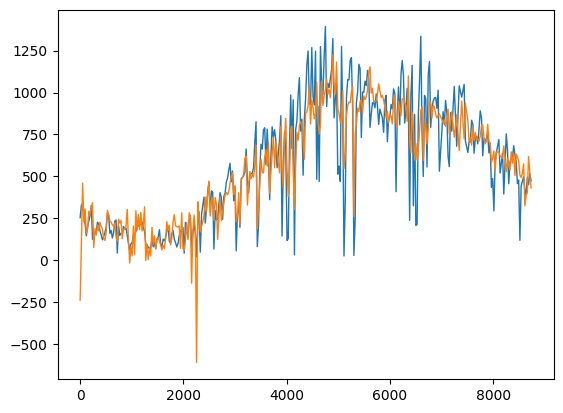

In [ ]:
plt.plot(gr_df["Rented Bike Count"], linewidth = 1)
plt.plot(predictions, linewidth = 1);

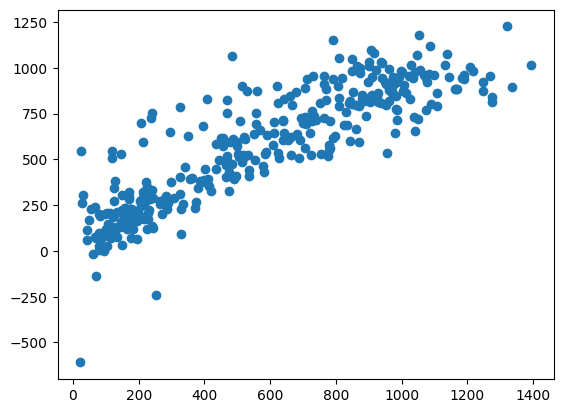

In [ ]:
plt.scatter(gr_df["Rented Bike Count"], predictions)

## Hour 1

ADF Statistic: -9.412309
p-value: 0.000000
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


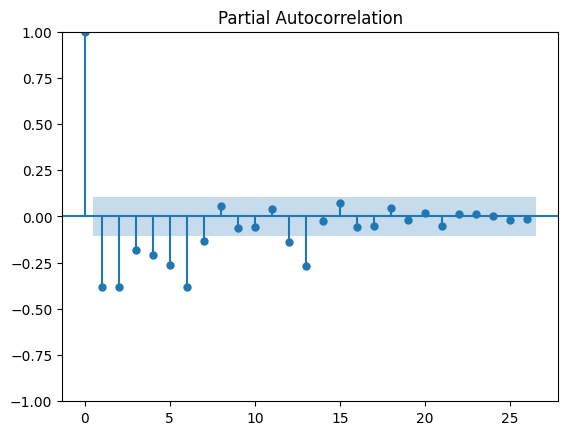

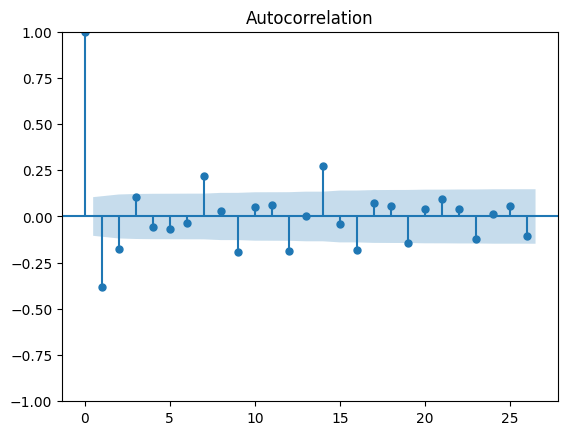

In [ ]:
h = 1
gr_df = grouped_data.get_group(h)
result = adfuller(gr_df["Rented Bike Count"].diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))
plot_pacf(gr_df["Rented Bike Count"].diff().dropna());
plot_acf(gr_df["Rented Bike Count"].diff().dropna());

In [ ]:
exog_v_choice = ['Temperature(°C)', 'Humidity(%)',
       'Rainfall(mm)']
exog_vs[h] = exog_v_choice
exog_v = gr_df[exog_v_choice]

# Create the ARMAX model
model = sm.tsa.arima.ARIMA(gr_df['Rented Bike Count'],
                            exog = exog_v,
                            order=(2, 1, 2))

# Fit the model to the training data
results = model.fit()
print(results.summary())
models[h] = results
print("\n")
predictions = results.predict(start = 0, exog=exog_v)
print(((gr_df['Rented Bike Count'] - predictions) ** 2).mean())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zero

                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                  352
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2270.629
Date:                Thu, 06 Apr 2023   AIC                           4557.258
Time:                        14:26:51   BIC                           4588.144
Sample:                             0   HQIC                          4569.550
                                - 352                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Temperature(°C)    11.0556      2.808      3.937      0.000       5.552      16.559
Humidity(%)        -2.9439      0.552     -5.336      0.000      -4.025      -1.863
Rainfall(mm)      -96.7376     1

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


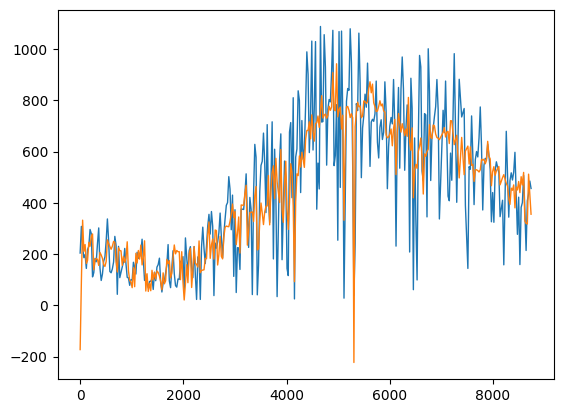

In [ ]:
plt.plot(gr_df["Rented Bike Count"], linewidth = 1)
plt.plot(predictions, linewidth = 1);

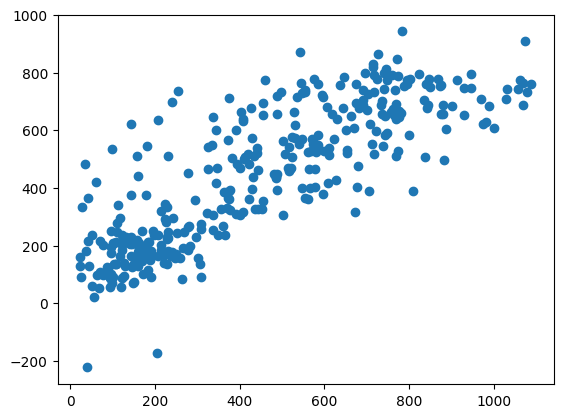

In [ ]:
plt.scatter(gr_df["Rented Bike Count"], predictions)

## Hour 2

ADF Statistic: -6.502008
p-value: 0.000000
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


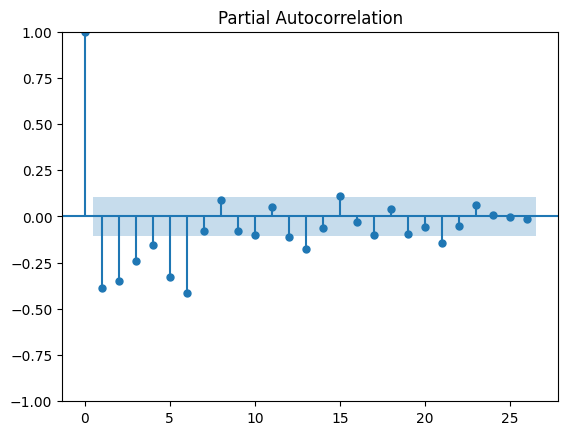

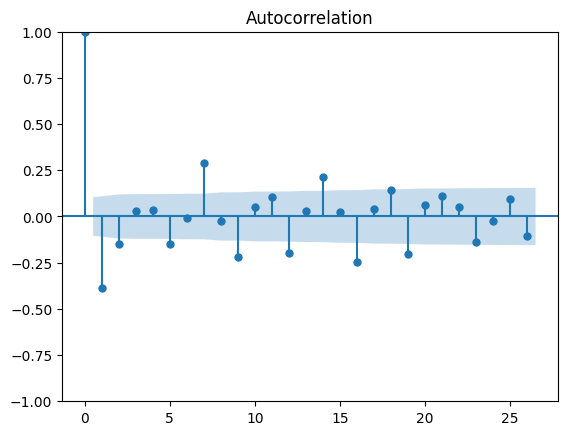

In [ ]:
h = 2
gr_df = grouped_data.get_group(h)
result = adfuller(gr_df["Rented Bike Count"].diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))
plot_pacf(gr_df["Rented Bike Count"].diff().dropna());
plot_acf(gr_df["Rented Bike Count"].diff().dropna());

In [ ]:
exog_v_choice = ['Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)',
       'Rainfall(mm)']
exog_vs[h] = exog_v_choice
exog_v = gr_df[exog_v_choice]

# Create the ARMAX model
model = sm.tsa.arima.ARIMA(gr_df['Rented Bike Count'],
                            exog = exog_v,
                            order=(6, 1, 3))

# Fit the model to the training data
results = model.fit()
print(results.summary())
models[h] = results
print("\n")
predictions = results.predict(start = 0, exog=exog_v)
print(((gr_df['Rented Bike Count'] - predictions) ** 2).mean())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                  352
Model:                 ARIMA(6, 1, 3)   Log Likelihood               -2153.057
Date:                Thu, 06 Apr 2023   AIC                           4334.114
Time:                        14:40:13   BIC                           4388.165
Sample:                             0   HQIC                          4355.626
                                - 352                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Temperature(°C)      5.1285      2.044      2.509      0.012       1.123       9.134
Humidity(%)         -1.1556      0.424     -2.723      0.006      -1.987      -0.324
Wind speed (m/s)   -18.0621 

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


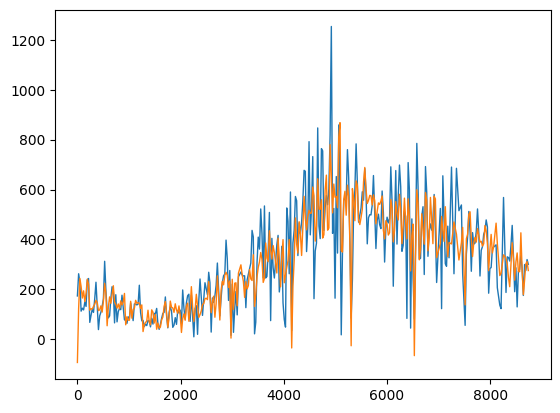

In [ ]:
plt.plot(gr_df["Rented Bike Count"], linewidth = 1)
plt.plot(predictions, linewidth = 1);

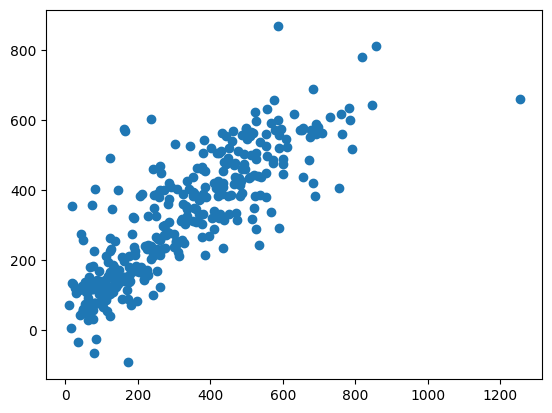

In [ ]:
plt.scatter(gr_df["Rented Bike Count"], predictions)

## Hour 3

ADF Statistic: -9.000583
p-value: 0.000000
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


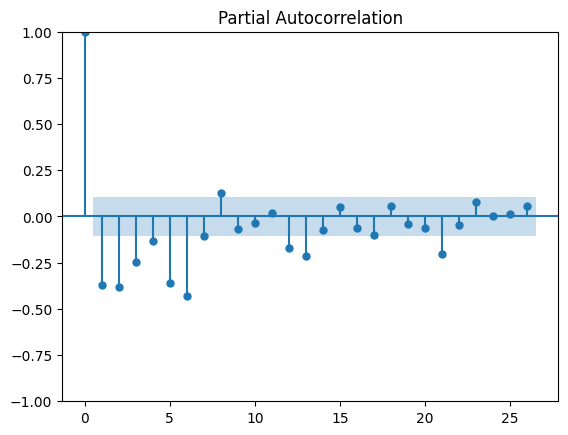

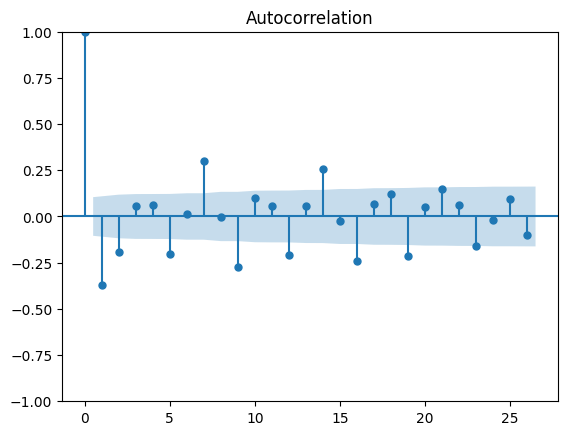

In [ ]:
h = 3
gr_df = grouped_data.get_group(h)
result = adfuller(gr_df["Rented Bike Count"].diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))
plot_pacf(gr_df["Rented Bike Count"].diff().dropna());
plot_acf(gr_df["Rented Bike Count"].diff().dropna());

In [ ]:
exog_v_choice = ['Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)',
       'Rainfall(mm)']
exog_vs[h] = exog_v_choice
exog_v = gr_df[exog_v_choice]

# Create the ARMAX model
model = sm.tsa.arima.ARIMA(gr_df['Rented Bike Count'],
                            exog = exog_v,
                            order=(6, 1, 3))

# Fit the model to the training data
results = model.fit()
print(results.summary())
models[h] = results
print("\n")
predictions = results.predict(start = 0, exog=exog_v)
print(((gr_df['Rented Bike Count'] - predictions) ** 2).mean())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                  352
Model:                 ARIMA(6, 1, 3)   Log Likelihood               -1998.318
Date:                Thu, 06 Apr 2023   AIC                           4024.635
Time:                        14:30:19   BIC                           4078.686
Sample:                             0   HQIC                          4046.147
                                - 352                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Temperature(°C)      4.6335      1.244      3.725      0.000       2.195       7.072
Humidity(%)         -0.7757      0.216     -3.597      0.000      -1.198      -0.353
Wind speed (m/s)   -13.1241 

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


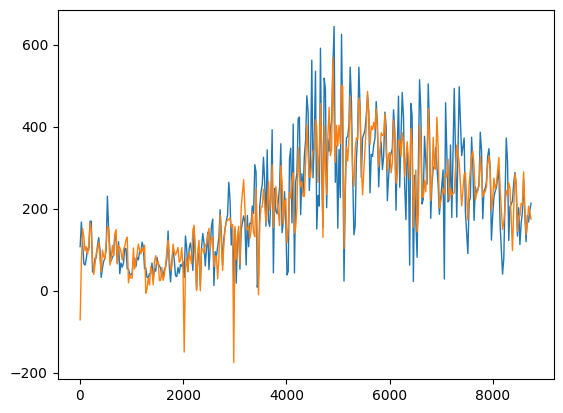

In [ ]:
plt.plot(gr_df["Rented Bike Count"], linewidth = 1)
plt.plot(predictions, linewidth = 1);

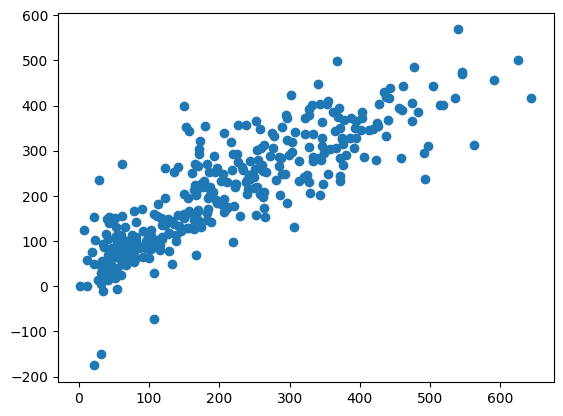

In [ ]:
plt.scatter(gr_df["Rented Bike Count"], predictions)

## Hour 4

ADF Statistic: -9.320239
p-value: 0.000000
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


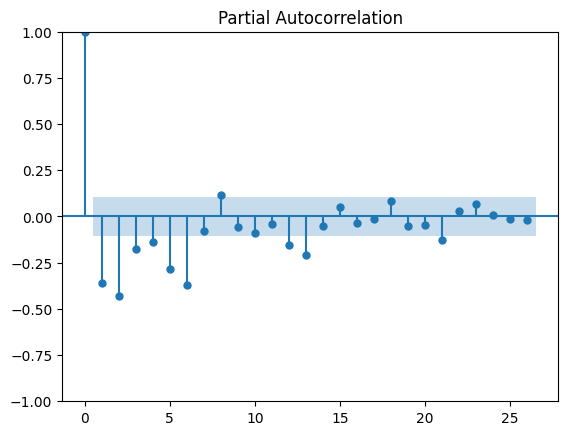

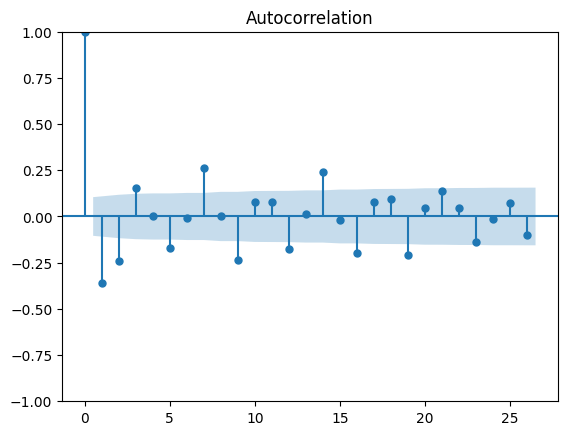

In [ ]:
h = 4
gr_df = grouped_data.get_group(h)
result = adfuller(gr_df["Rented Bike Count"].diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))
plot_pacf(gr_df["Rented Bike Count"].diff().dropna());
plot_acf(gr_df["Rented Bike Count"].diff().dropna());

In [ ]:
exog_v_choice = ['Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)',
       'Rainfall(mm)']
exog_vs[h] = exog_v_choice
exog_v = gr_df[exog_v_choice]

# Create the ARMAX model
model = sm.tsa.arima.ARIMA(gr_df['Rented Bike Count'],
                            exog = exog_v,
                            order=(6, 1, 3))

# Fit the model to the training data
results = model.fit()
print(results.summary())
models[h] = results
print("\n")
predictions = results.predict(start = 0, exog=exog_v)
print(((gr_df['Rented Bike Count'] - predictions) ** 2).mean())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                  352
Model:                 ARIMA(6, 1, 3)   Log Likelihood               -1848.870
Date:                Thu, 06 Apr 2023   AIC                           3725.739
Time:                        14:33:24   BIC                           3779.790
Sample:                             0   HQIC                          3747.251
                                - 352                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Temperature(°C)      2.5911      0.916      2.829      0.005       0.796       4.386
Humidity(%)         -0.8197      0.152     -5.400      0.000      -1.117      -0.522
Wind speed (m/s)    -8.1384 

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


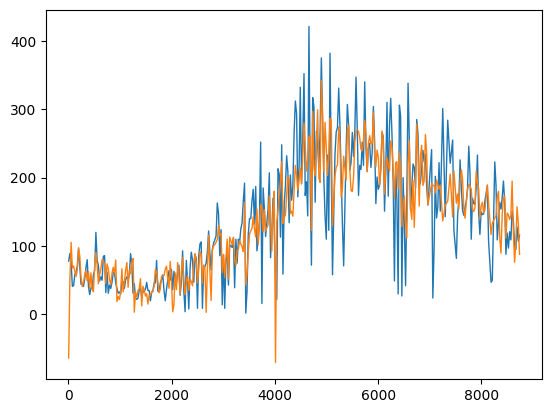

In [ ]:
plt.plot(gr_df["Rented Bike Count"], linewidth = 1)
plt.plot(predictions, linewidth = 1);

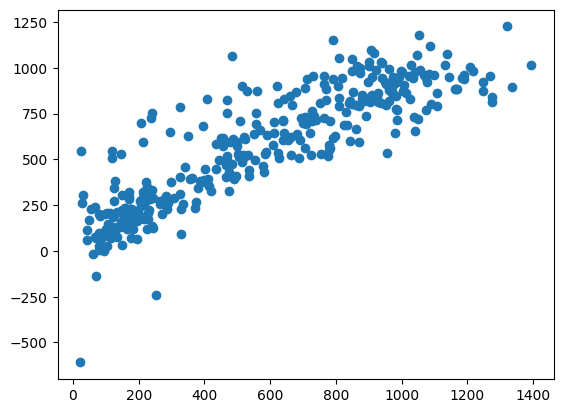

In [ ]:
plt.scatter(gr_df["Rented Bike Count"], predictions)

## Hour 5

ADF Statistic: -8.291562
p-value: 0.000000
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


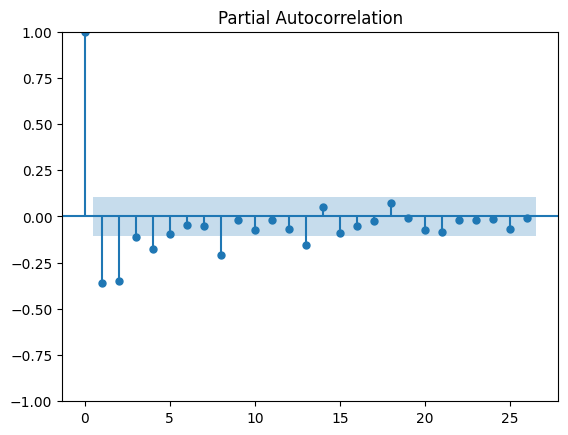

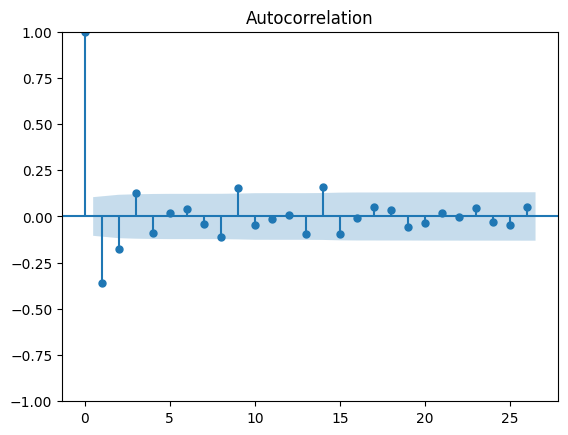

In [ ]:
h = 5
gr_df = grouped_data.get_group(h)
result = adfuller(gr_df["Rented Bike Count"].diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))
plot_pacf(gr_df["Rented Bike Count"].diff().dropna());
plot_acf(gr_df["Rented Bike Count"].diff().dropna());

In [ ]:
exog_v_choice = ['Humidity(%)',
       'Wind speed (m/s)',
       'Rainfall(mm)']
exog_vs[h] = exog_v_choice
exog_v = gr_df[exog_v_choice]

# Create the ARMAX model
model = sm.tsa.arima.ARIMA(gr_df['Rented Bike Count'],
                            exog = exog_v,
                            order=(1, 1, 1))

# Fit the model to the training data
results = model.fit()
print(results.summary())
models[h] = results
print("\n")
predictions = results.predict(start = 0, exog=exog_v)
print(((gr_df['Rented Bike Count'] - predictions) ** 2).mean())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                  352
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1854.896
Date:                Thu, 06 Apr 2023   AIC                           3721.793
Time:                        14:37:58   BIC                           3744.957
Sample:                             0   HQIC                          3731.012
                                - 352                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Humidity(%)         -0.5998      0.186     -3.218      0.001      -0.965      -0.235
Wind speed (m/s)   -11.0203      3.353     -3.287      0.001     -17.591      -4.449
Rainfall(mm)       -29.0570 

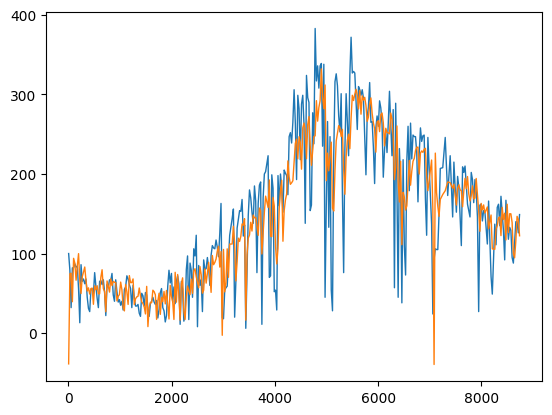

In [ ]:
plt.plot(gr_df["Rented Bike Count"], linewidth = 1)
plt.plot(predictions, linewidth = 1);

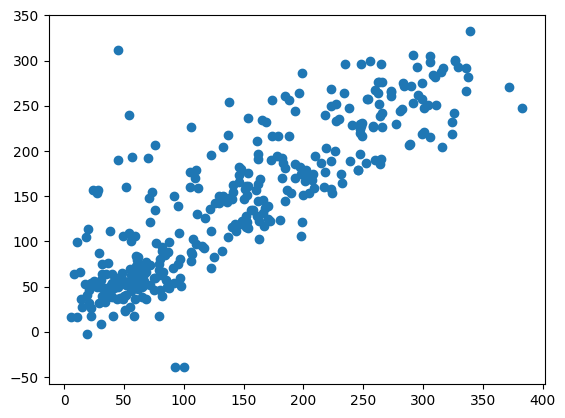

In [ ]:
plt.scatter(gr_df["Rented Bike Count"], predictions)

## Hour 6

ADF Statistic: -9.513841
p-value: 0.000000
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


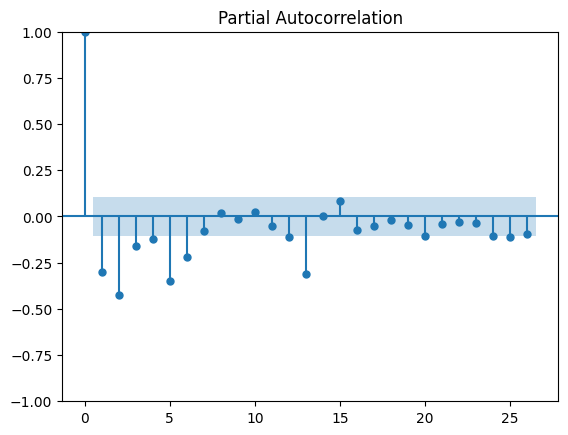

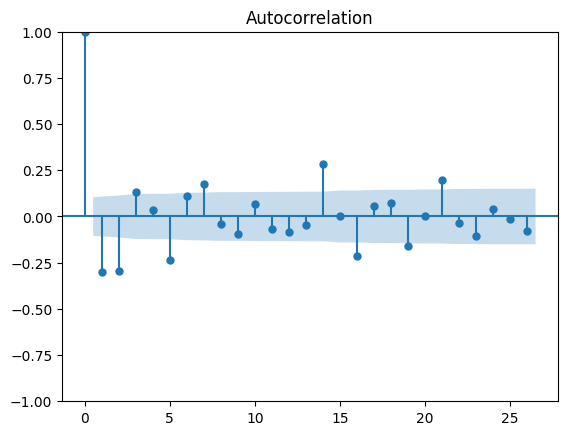

In [ ]:
h = 6
gr_df = grouped_data.get_group(h)
result = adfuller(gr_df["Rented Bike Count"].diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))
plot_pacf(gr_df["Rented Bike Count"].diff().dropna());
plot_acf(gr_df["Rented Bike Count"].diff().dropna());

In [ ]:
exog_v_choice = [
       'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)']
exog_vs[h] = exog_v_choice
exog_v = gr_df[exog_v_choice]

# Create the ARMAX model
model = sm.tsa.arima.ARIMA(gr_df['Rented Bike Count'],
                            exog = exog_v,
                            order=(4, 1, 5))

# Fit the model to the training data
results = model.fit()
print(results.summary())
models[h] = results
print("\n")
predictions = results.predict(start = 0, exog=exog_v)
print(((gr_df['Rented Bike Count'] - predictions) ** 2).mean())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                  352
Model:                 ARIMA(4, 1, 5)   Log Likelihood               -2203.976
Date:                Thu, 06 Apr 2023   AIC                           4433.952
Time:                        14:45:20   BIC                           4484.142
Sample:                             0   HQIC                          4453.927
                                - 352                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Visibility (10m)            0.0367      0.014      2.693      0.007       0.010       0.063
Solar Radiation (MJ/m2)  3342.2156    566.635      5.898      0.000    2231.632    4452.799


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


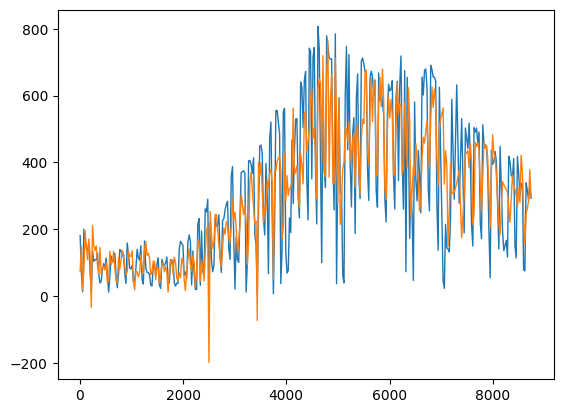

In [ ]:
plt.plot(gr_df["Rented Bike Count"], linewidth = 1)
plt.plot(predictions, linewidth = 1);

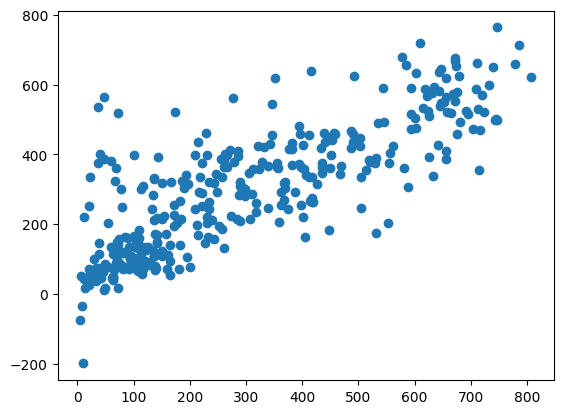

In [ ]:
plt.scatter(gr_df["Rented Bike Count"], predictions)

## Hour 7

ADF Statistic: -6.478480
p-value: 0.000000
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


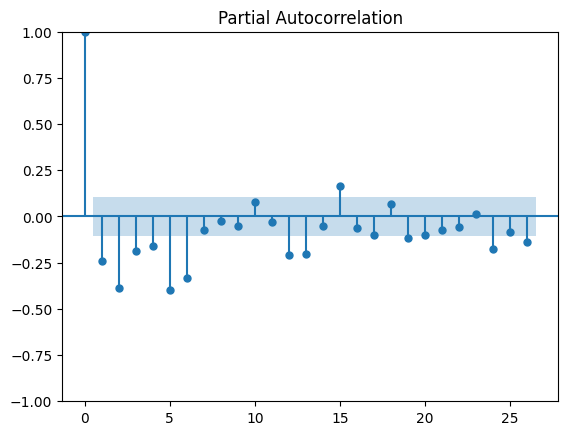

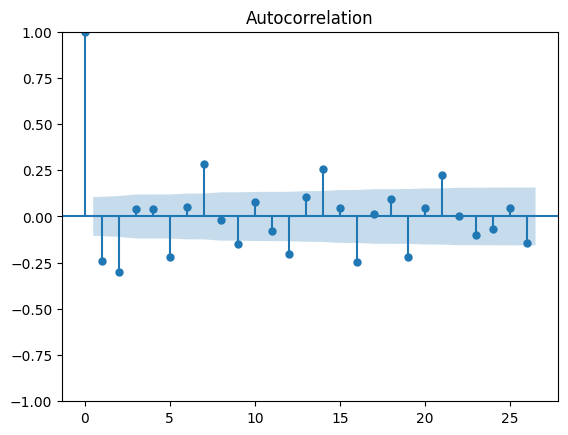

In [ ]:
h = 7
gr_df = grouped_data.get_group(h)
result = adfuller(gr_df["Rented Bike Count"].diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))
plot_pacf(gr_df["Rented Bike Count"].diff().dropna());
plot_acf(gr_df["Rented Bike Count"].diff().dropna());

In [ ]:
exog_v_choice = [
       'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)']
exog_vs[h] = exog_v_choice
exog_v = gr_df[exog_v_choice]

# Create the ARMAX model
model = sm.tsa.arima.ARIMA(gr_df['Rented Bike Count'],
                            exog = exog_v,
                            order=(4, 1, 3))

# Fit the model to the training data
results = model.fit()
print(results.summary())
models[h] = results
print("\n")
predictions = results.predict(start = 0, exog=exog_v)
print(((gr_df['Rented Bike Count'] - predictions) ** 2).mean())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                  353
Model:                 ARIMA(4, 1, 3)   Log Likelihood               -2527.388
Date:                Thu, 06 Apr 2023   AIC                           5076.777
Time:                        14:48:14   BIC                           5119.276
Sample:                             0   HQIC                          5093.689
                                - 353                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Visibility (10m)            0.0763      0.028      2.683      0.007       0.021       0.132
Solar Radiation (MJ/m2)  1294.8255    169.183      7.653      0.000     963.232    1626.419


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


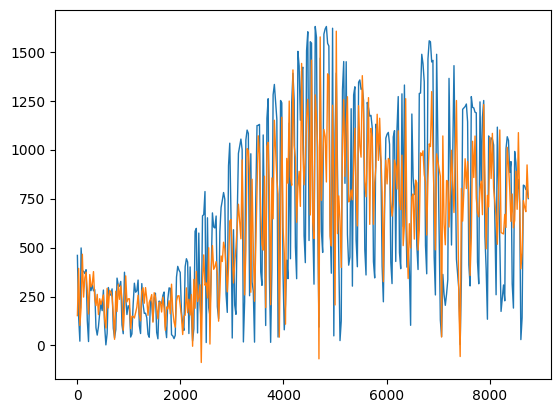

In [ ]:
plt.plot(gr_df["Rented Bike Count"], linewidth = 1)
plt.plot(predictions, linewidth = 1);

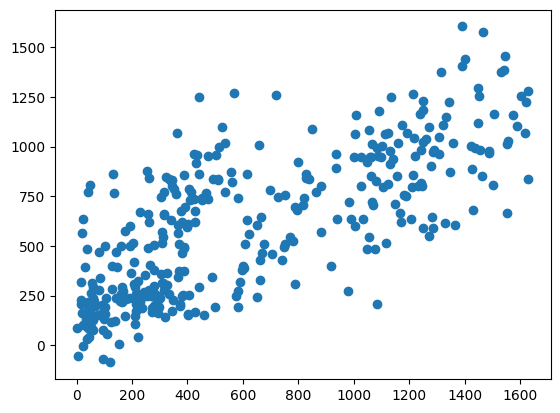

In [ ]:
plt.scatter(gr_df["Rented Bike Count"], predictions)

## Hour 8

ADF Statistic: -5.782096
p-value: 0.000001
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


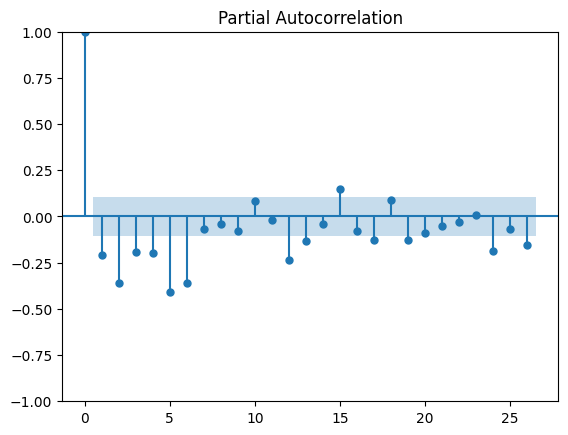

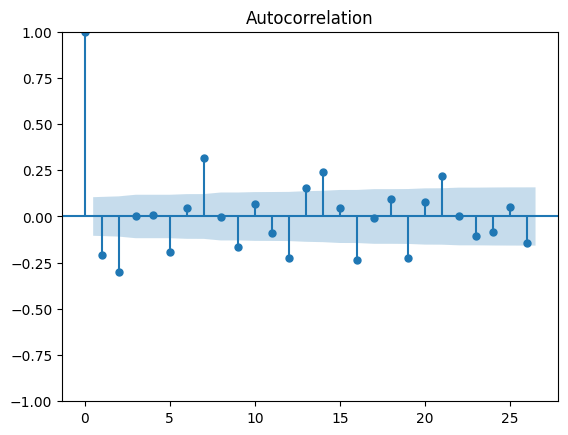

In [ ]:
h = 8
gr_df = grouped_data.get_group(h)
result = adfuller(gr_df["Rented Bike Count"].diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))
plot_pacf(gr_df["Rented Bike Count"].diff().dropna());
plot_acf(gr_df["Rented Bike Count"].diff().dropna());

In [ ]:
exog_v_choice = ['Humidity(%)',
       'Solar Radiation (MJ/m2)',
       'Rainfall(mm)']
exog_vs[h] = exog_v_choice
exog_v = gr_df[exog_v_choice]

# Create the ARMAX model
model = sm.tsa.arima.ARIMA(gr_df['Rented Bike Count'],
                            exog = exog_v,
                            order=(4, 1, 3))

# Fit the model to the training data
results = model.fit()
print(results.summary())
models[h] = results
print("\n")
predictions = results.predict(start = 0, exog=exog_v)
print(((gr_df['Rented Bike Count'] - predictions) ** 2).mean())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                  353
Model:                 ARIMA(4, 1, 3)   Log Likelihood               -2685.607
Date:                Thu, 06 Apr 2023   AIC                           5393.214
Time:                        14:50:50   BIC                           5435.714
Sample:                             0   HQIC                          5410.127
                                - 353                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Humidity(%)                -7.3353      2.609     -2.812      0.005     -12.449      -2.222
Solar Radiation (MJ/m2)   512.5878    131.571      3.896      0.000     254.714     770.462


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


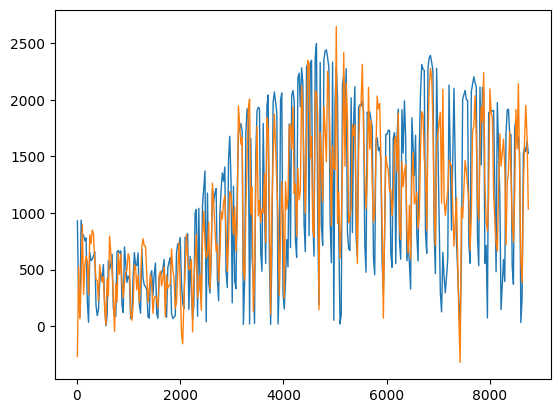

In [ ]:
plt.plot(gr_df["Rented Bike Count"], linewidth = 1)
plt.plot(predictions, linewidth = 1);

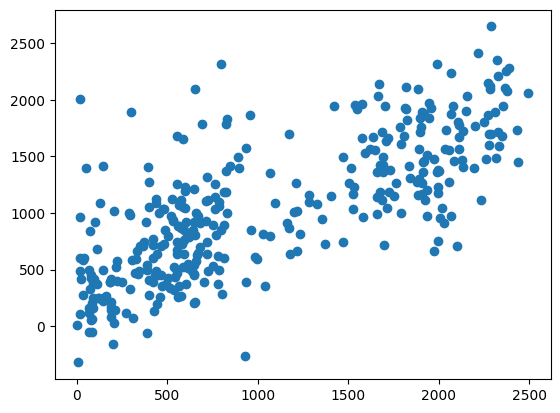

In [ ]:
plt.scatter(gr_df["Rented Bike Count"], predictions)

## Hour 9

ADF Statistic: -8.678810
p-value: 0.000000
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


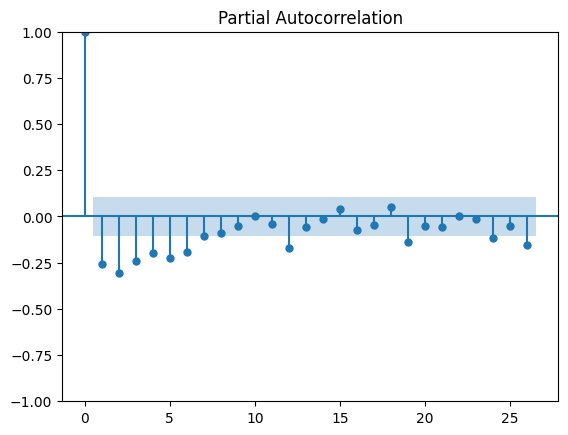

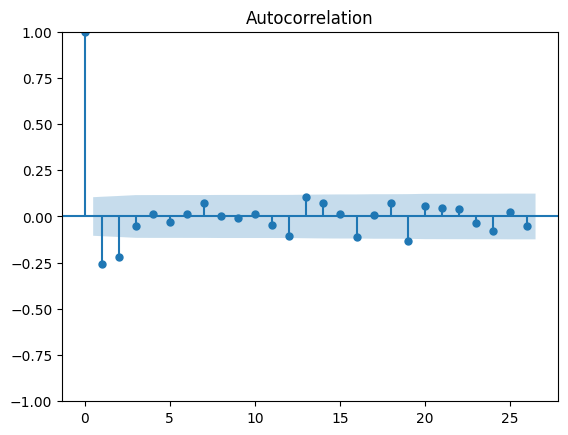

In [ ]:
h = 9
gr_df = grouped_data.get_group(h)
result = adfuller(gr_df["Rented Bike Count"].diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))
plot_pacf(gr_df["Rented Bike Count"].diff().dropna());
plot_acf(gr_df["Rented Bike Count"].diff().dropna());

In [ ]:
exog_v_choice = ['Temperature(°C)', 'Humidity(%)',
       'Solar Radiation (MJ/m2)',
       'Rainfall(mm)']
exog_vs[h] = exog_v_choice
exog_v = gr_df[exog_v_choice]

# Create the ARMAX model
model = sm.tsa.arima.ARIMA(gr_df['Rented Bike Count'],
                            exog = exog_v,
                            order=(4, 1, 3))

# Fit the model to the training data
results = model.fit()
print(results.summary())
models[h] = results
print("\n")
predictions = results.predict(start = 0, exog=exog_v)
print(((gr_df['Rented Bike Count'] - predictions) ** 2).mean())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                  353
Model:                 ARIMA(4, 1, 3)   Log Likelihood               -2352.519
Date:                Thu, 06 Apr 2023   AIC                           4729.038
Time:                        14:53:27   BIC                           4775.402
Sample:                             0   HQIC                          4747.488
                                - 353                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Temperature(°C)            14.9586      4.256      3.515      0.000       6.617      23.300
Humidity(%)                -3.3786      1.027     -3.290      0.001      -5.391      -1.366


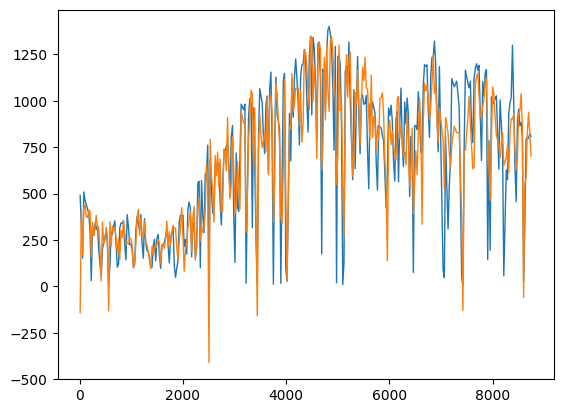

In [ ]:
plt.plot(gr_df["Rented Bike Count"], linewidth = 1)
plt.plot(predictions, linewidth = 1);

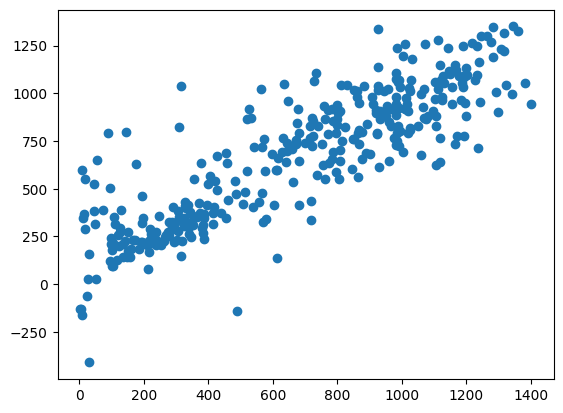

In [ ]:
plt.scatter(gr_df["Rented Bike Count"], predictions)

## Hour 10

ADF Statistic: -8.688736
p-value: 0.000000
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


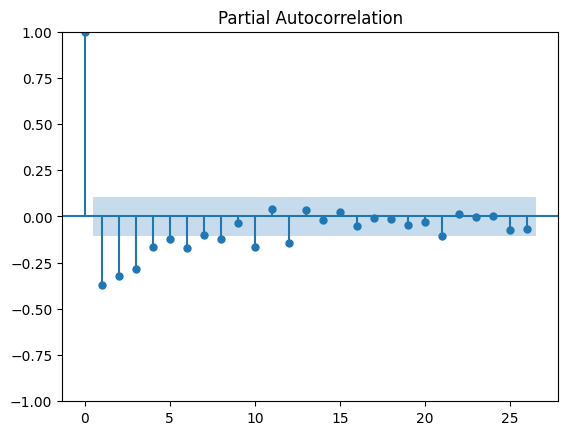

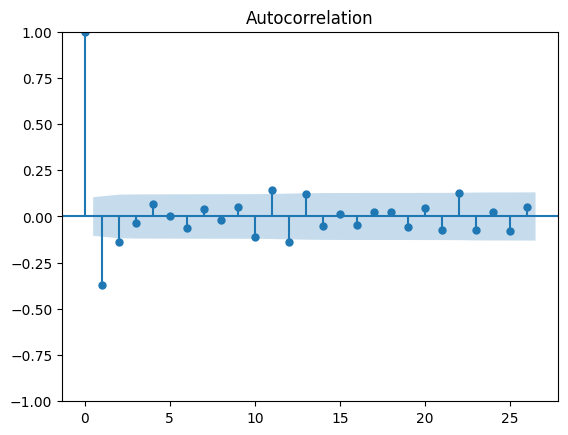

In [ ]:
h = 10
gr_df = grouped_data.get_group(h)
result = adfuller(gr_df["Rented Bike Count"].diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))
plot_pacf(gr_df["Rented Bike Count"].diff().dropna());
plot_acf(gr_df["Rented Bike Count"].diff().dropna());

In [ ]:
exog_v_choice = ['Temperature(°C)', 'Humidity(%)',
       'Solar Radiation (MJ/m2)',
       'Rainfall(mm)']
exog_vs[h] = exog_v_choice
exog_v = gr_df[exog_v_choice]

# Create the ARMAX model
model = sm.tsa.arima.ARIMA(gr_df['Rented Bike Count'],
                            exog = exog_v,
                            order=(0, 1, 1))

# Fit the model to the training data
results = model.fit()
print(results.summary())
models[h] = results
print("\n")
predictions = results.predict(start = 0, exog=exog_v)
print(((gr_df['Rented Bike Count'] - predictions) ** 2).mean())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                  353
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -2234.951
Date:                Thu, 06 Apr 2023   AIC                           4481.902
Time:                        15:00:04   BIC                           4505.084
Sample:                             0   HQIC                          4491.127
                                - 353                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Temperature(°C)            12.6371      2.726      4.637      0.000       7.295      17.979
Humidity(%)                -3.3880      0.630     -5.379      0.000      -4.623      -2.153


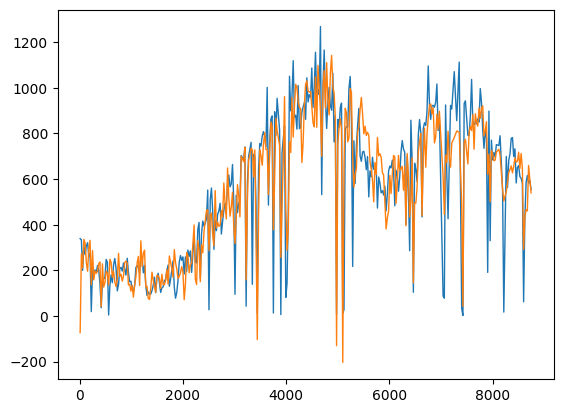

In [ ]:
plt.plot(gr_df["Rented Bike Count"], linewidth = 1)
plt.plot(predictions, linewidth = 1);

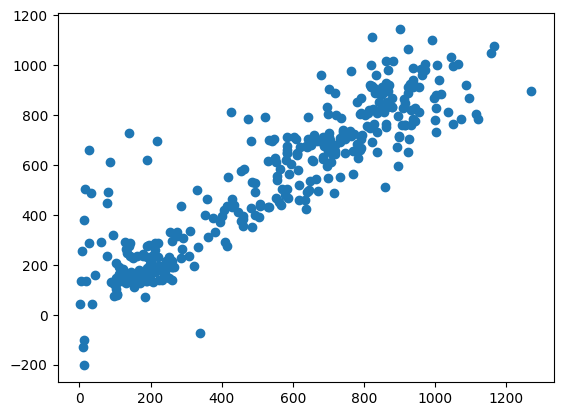

In [ ]:
plt.scatter(gr_df["Rented Bike Count"], predictions)

## Hour 11

ADF Statistic: -9.862987
p-value: 0.000000
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


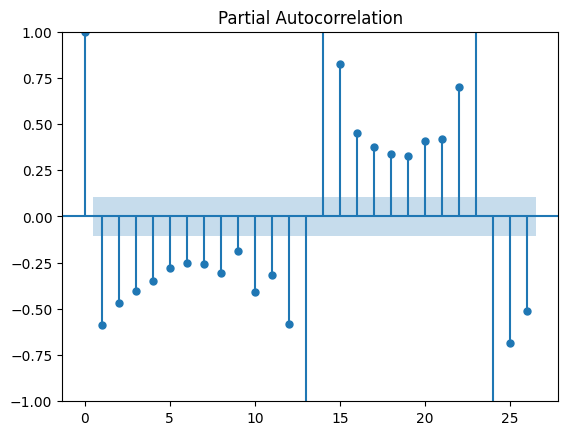

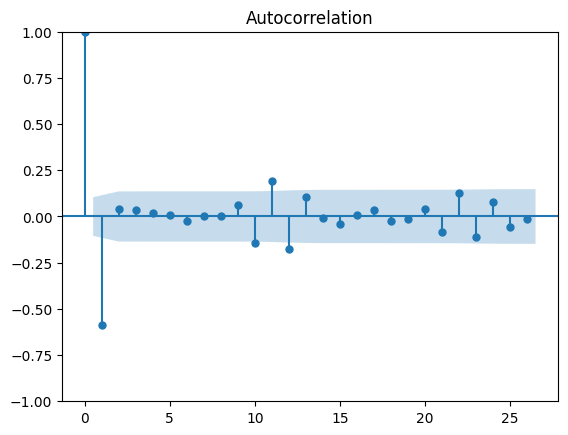

In [ ]:
h = 11
gr_df = grouped_data.get_group(h)
result = adfuller(gr_df["Rented Bike Count"].diff().diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))
plot_pacf(gr_df["Rented Bike Count"].diff().diff().dropna());
plot_acf(gr_df["Rented Bike Count"].diff().diff().dropna());

In [ ]:
exog_v_choice = ['Temperature(°C)', 'Humidity(%)',
       'Solar Radiation (MJ/m2)',
       'Rainfall(mm)',]
exog_vs[h] = exog_v_choice
exog_v = gr_df[exog_v_choice]

# Create the ARMAX model
model = sm.tsa.arima.ARIMA(gr_df['Rented Bike Count'],
                            exog = exog_v,
                            order=(4, 2, 1))

# Fit the model to the training data
results = model.fit()
print(results.summary())
models[h] = results
print("\n")
predictions = results.predict(start = 0, exog=exog_v)
print(((gr_df['Rented Bike Count'] - predictions) ** 2).mean())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                  353
Model:                 ARIMA(4, 2, 1)   Log Likelihood               -2290.066
Date:                Thu, 06 Apr 2023   AIC                           4600.132
Time:                        15:10:43   BIC                           4638.740
Sample:                             0   HQIC                          4615.498
                                - 353                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Temperature(°C)            17.2473      3.326      5.186      0.000      10.729      23.766
Humidity(%)                -4.8072      0.813     -5.911      0.000      -6.401      -3.213


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


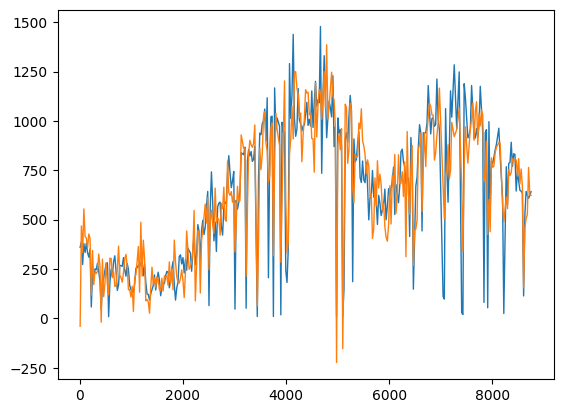

In [ ]:
plt.plot(gr_df["Rented Bike Count"], linewidth = 1)
plt.plot(predictions, linewidth = 1);

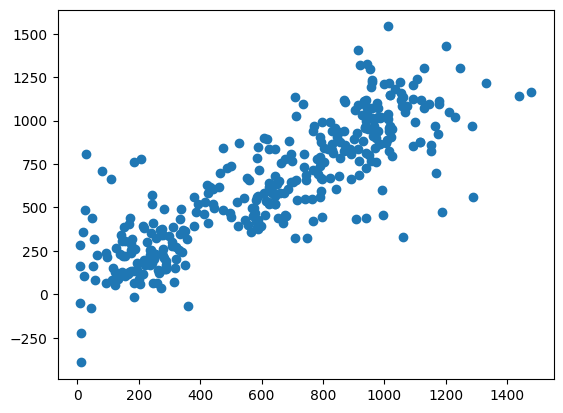

In [ ]:
plt.scatter(gr_df["Rented Bike Count"], predictions)

## Hour 12

ADF Statistic: -9.123511
p-value: 0.000000
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


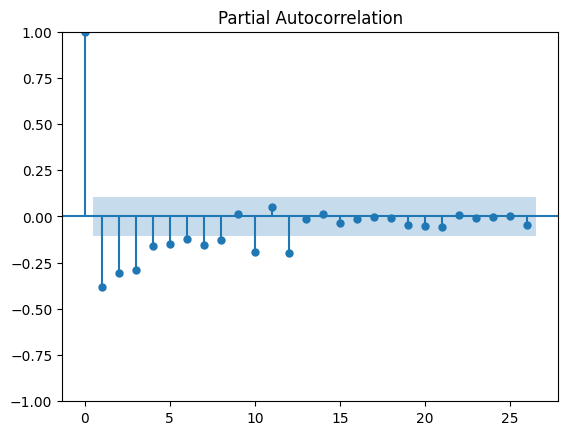

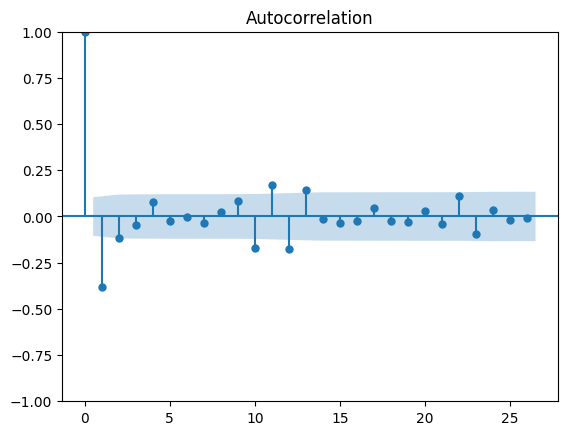

In [ ]:
h = 12
gr_df = grouped_data.get_group(h)
result = adfuller(gr_df["Rented Bike Count"].diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))
plot_pacf(gr_df["Rented Bike Count"].diff().dropna());
plot_acf(gr_df["Rented Bike Count"].diff().dropna());

In [ ]:
exog_v_choice = ['Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)','Solar Radiation (MJ/m2)',
       'Rainfall(mm)']
exog_vs[h] = exog_v_choice
exog_v = gr_df[exog_v_choice]

# Create the ARMAX model
model = sm.tsa.arima.ARIMA(gr_df['Rented Bike Count'],
                            exog = exog_v,
                            order=(3, 1, 2))

# Fit the model to the training data
results = model.fit()
print(results.summary())
models[h] = results
print("\n")
predictions = results.predict(start = 0, exog=exog_v)
print(((gr_df['Rented Bike Count'] - predictions) ** 2).mean())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zero

                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                  353
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -2360.644
Date:                Thu, 06 Apr 2023   AIC                           4743.288
Time:                        15:16:25   BIC                           4785.788
Sample:                             0   HQIC                          4760.201
                                - 353                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Temperature(°C)            23.4937      4.178      5.623      0.000      15.305      31.682
Humidity(%)                -6.0522      1.077     -5.621      0.000      -8.162      -3.942


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


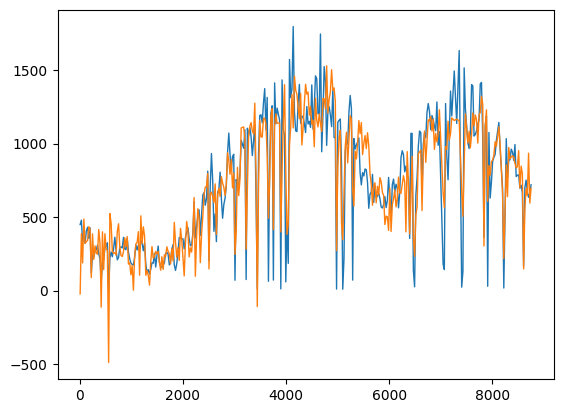

In [ ]:
plt.plot(gr_df["Rented Bike Count"], linewidth = 1)
plt.plot(predictions, linewidth = 1);

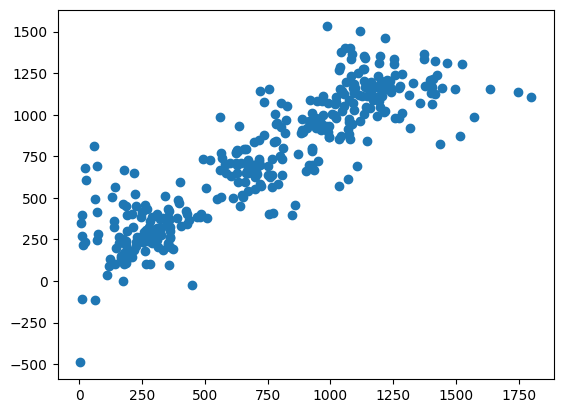

In [ ]:
plt.scatter(gr_df["Rented Bike Count"], predictions)

## Hour 13

ADF Statistic: -9.286306
p-value: 0.000000
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


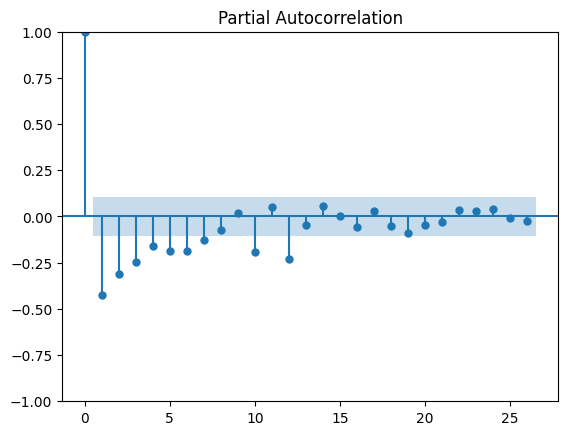

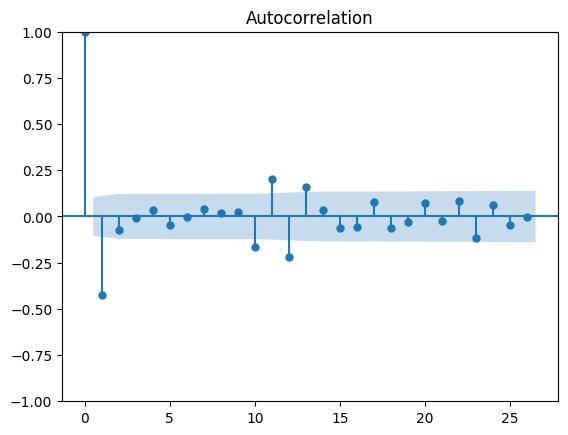

In [ ]:
h = 13
gr_df = grouped_data.get_group(h)
result = adfuller(gr_df["Rented Bike Count"].diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))
plot_pacf(gr_df["Rented Bike Count"].diff().dropna());
plot_acf(gr_df["Rented Bike Count"].diff().dropna());

In [ ]:
exog_v_choice = ['Temperature(°C)', 'Humidity(%)',
       'Rainfall(mm)']
exog_vs[h] = exog_v_choice
exog_v = gr_df[exog_v_choice]

# Create the ARMAX model
model = sm.tsa.arima.ARIMA(gr_df['Rented Bike Count'],
                            exog = exog_v,
                            order=(1, 1, 2))

# Fit the model to the training data
results = model.fit()
print(results.summary())
models[h] = results
print("\n")
predictions = results.predict(start = 0, exog=exog_v)
print(((gr_df['Rented Bike Count'] - predictions) ** 2).mean())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                  353
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -2411.327
Date:                Thu, 06 Apr 2023   AIC                           4836.655
Time:                        15:19:11   BIC                           4863.700
Sample:                             0   HQIC                          4847.417
                                - 353                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Temperature(°C)    23.3866      4.413      5.299      0.000      14.737      32.036
Humidity(%)        -7.8460      0.700    -11.212      0.000      -9.218      -6.474
Rainfall(mm)      -26.9186      

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


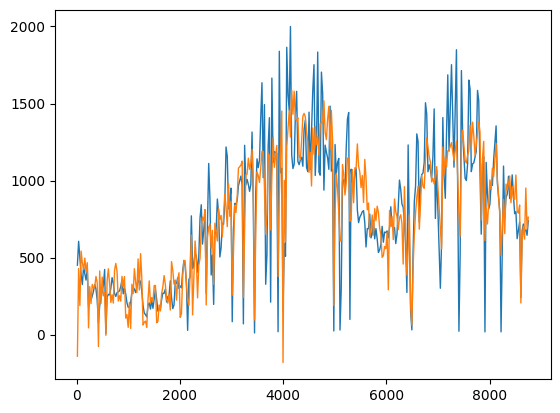

In [ ]:
plt.plot(gr_df["Rented Bike Count"], linewidth = 1)
plt.plot(predictions, linewidth = 1);

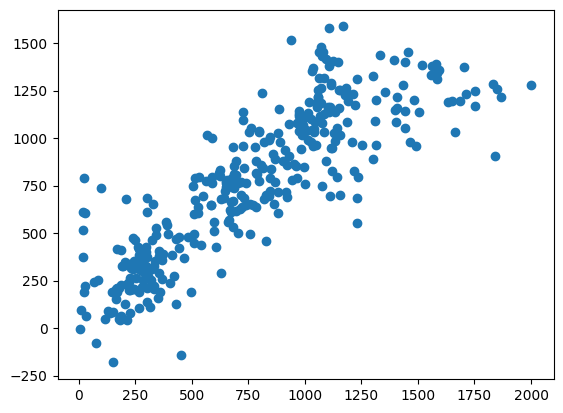

In [ ]:
plt.scatter(gr_df["Rented Bike Count"], predictions)

## Hour 14

ADF Statistic: -9.140665
p-value: 0.000000
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


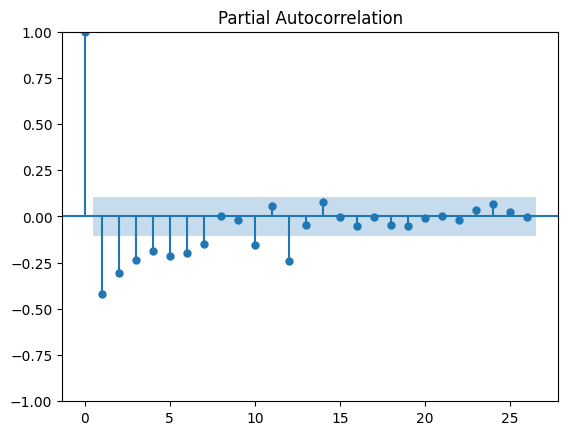

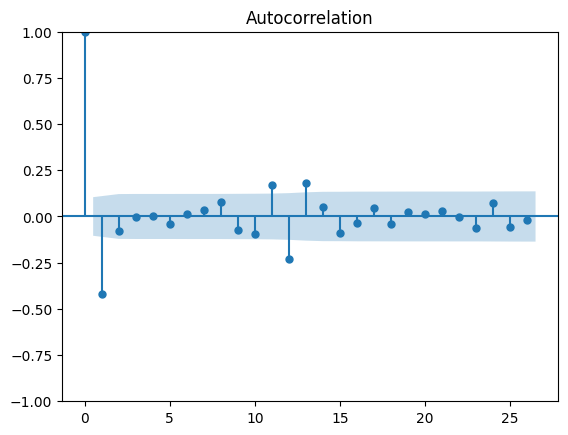

In [ ]:
h = 14
gr_df = grouped_data.get_group(h)
result = adfuller(gr_df["Rented Bike Count"].diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))
plot_pacf(gr_df["Rented Bike Count"].diff().dropna());
plot_acf(gr_df["Rented Bike Count"].diff().dropna());

In [ ]:
exog_v_choice = ['Temperature(°C)', 'Humidity(%)',
       'Solar Radiation (MJ/m2)',
       'Rainfall(mm)']
exog_vs[h] = exog_v_choice
exog_v = gr_df[exog_v_choice]

# Create the ARMAX model
model = sm.tsa.arima.ARIMA(gr_df['Rented Bike Count'],
                            exog = exog_v,
                            order=(2, 1, 2))

# Fit the model to the training data
results = model.fit()
print(results.summary())
models[h] = results
print("\n")
predictions = results.predict(start = 0, exog=exog_v)
print(((gr_df['Rented Bike Count'] - predictions) ** 2).mean())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zero

                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                  353
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2443.171
Date:                Thu, 06 Apr 2023   AIC                           4904.341
Time:                        15:26:05   BIC                           4939.114
Sample:                             0   HQIC                          4918.179
                                - 353                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Temperature(°C)            18.2577      5.447      3.352      0.001       7.582      28.933
Humidity(%)                -5.2833      1.191     -4.435      0.000      -7.618      -2.949


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


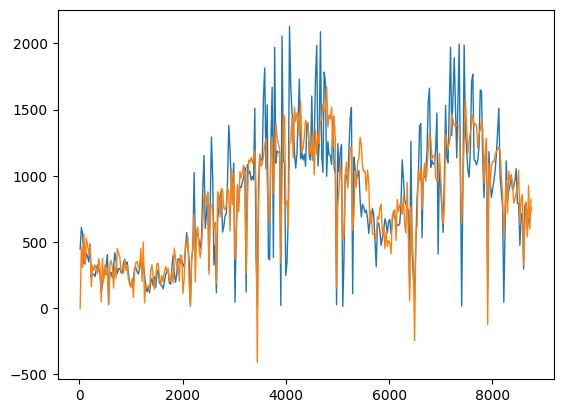

In [ ]:
plt.plot(gr_df["Rented Bike Count"], linewidth = 1)
plt.plot(predictions, linewidth = 1);

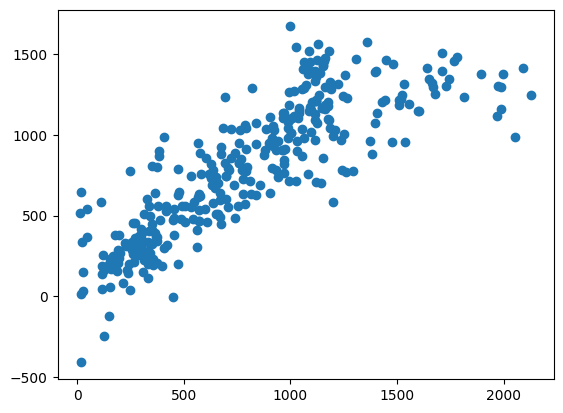

In [ ]:
plt.scatter(gr_df["Rented Bike Count"], predictions)

## Hour 15

ADF Statistic: -8.921345
p-value: 0.000000
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


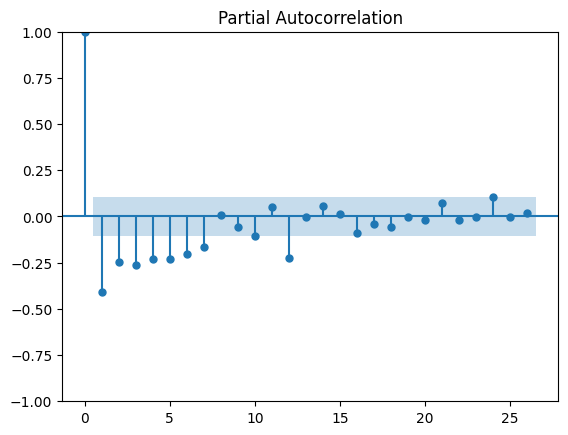

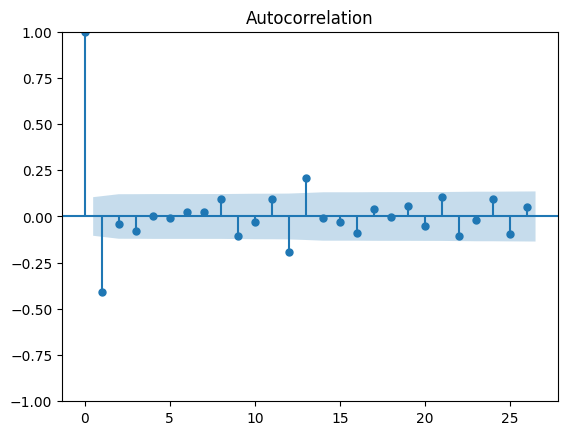

In [ ]:
h = 15
gr_df = grouped_data.get_group(h)
result = adfuller(gr_df["Rented Bike Count"].diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))
plot_pacf(gr_df["Rented Bike Count"].diff().dropna());
plot_acf(gr_df["Rented Bike Count"].diff().dropna());

In [ ]:
exog_v_choice = ['Temperature(°C)', 'Humidity(%)',
       'Solar Radiation (MJ/m2)',
       'Rainfall(mm)']
exog_vs[h] = exog_v_choice
exog_v = gr_df[exog_v_choice]

# Create the ARMAX model
model = sm.tsa.arima.ARIMA(gr_df['Rented Bike Count'],
                            exog = exog_v,
                            order=(4, 1, 2))

# Fit the model to the training data
results = model.fit()
print(results.summary())
models[h] = results
print("\n")
predictions = results.predict(start = 0, exog=exog_v)
print(((gr_df['Rented Bike Count'] - predictions) ** 2).mean())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zero

                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                  353
Model:                 ARIMA(4, 1, 2)   Log Likelihood               -2488.224
Date:                Thu, 06 Apr 2023   AIC                           4998.449
Time:                        15:27:57   BIC                           5040.948
Sample:                             0   HQIC                          5015.361
                                - 353                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Temperature(°C)            20.2579      6.087      3.328      0.001       8.328      32.187
Humidity(%)                -6.8945      1.265     -5.450      0.000      -9.374      -4.415


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


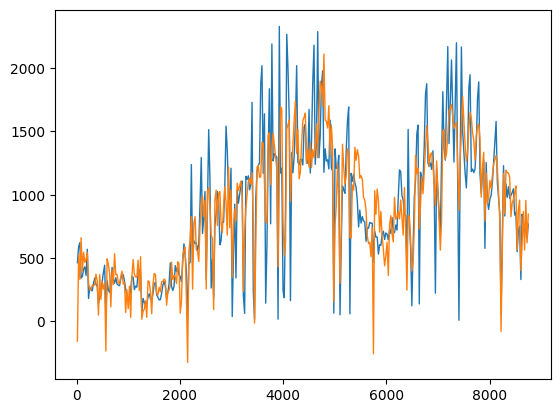

In [ ]:
plt.plot(gr_df["Rented Bike Count"], linewidth = 1)
plt.plot(predictions, linewidth = 1);

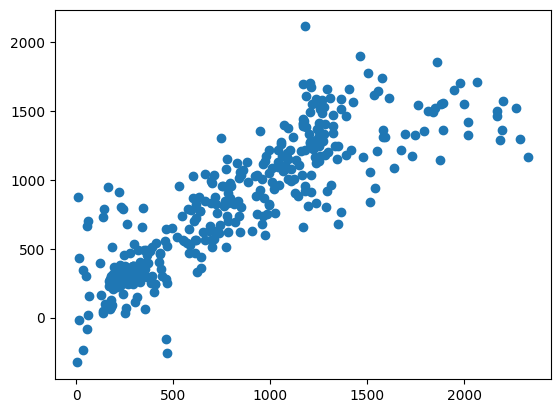

In [ ]:
plt.scatter(gr_df["Rented Bike Count"], predictions)

## Hour 16

ADF Statistic: -9.076541
p-value: 0.000000
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


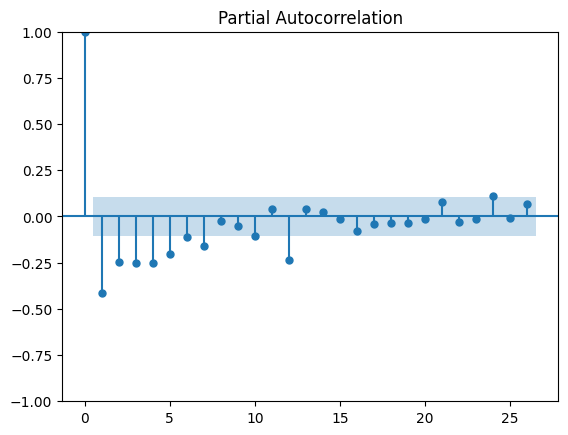

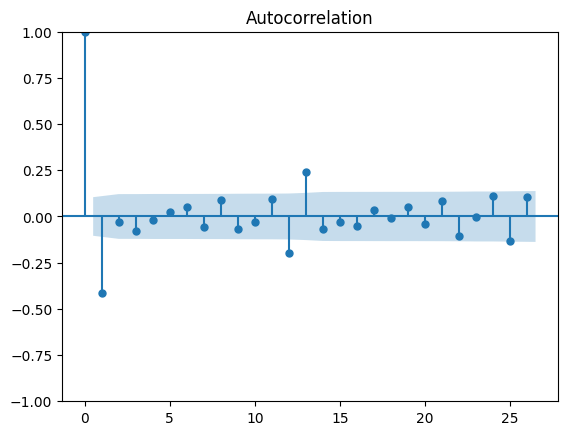

In [ ]:
h = 16
gr_df = grouped_data.get_group(h)
result = adfuller(gr_df["Rented Bike Count"].diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))
plot_pacf(gr_df["Rented Bike Count"].diff().dropna());
plot_acf(gr_df["Rented Bike Count"].diff().dropna());

In [ ]:
exog_v_choice = ['Temperature(°C)', 'Humidity(%)',
       'Solar Radiation (MJ/m2)',
       'Rainfall(mm)']
exog_vs[h] = exog_v_choice
exog_v = gr_df[exog_v_choice]

# Create the ARMAX model
model = sm.tsa.arima.ARIMA(gr_df['Rented Bike Count'],
                            exog = exog_v,
                            order=(2, 1, 3))

# Fit the model to the training data
results = model.fit()
print(results.summary())
models[h] = results
print("\n")
predictions = results.predict(start = 0, exog=exog_v)
print(((gr_df['Rented Bike Count'] - predictions) ** 2).mean())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                  353
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -2491.332
Date:                Thu, 06 Apr 2023   AIC                           5002.663
Time:                        15:32:58   BIC                           5041.300
Sample:                             0   HQIC                          5018.039
                                - 353                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Temperature(°C)            24.6590      6.296      3.917      0.000      12.319      36.999
Humidity(%)                -7.5628      1.250     -6.048      0.000     -10.014      -5.112


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


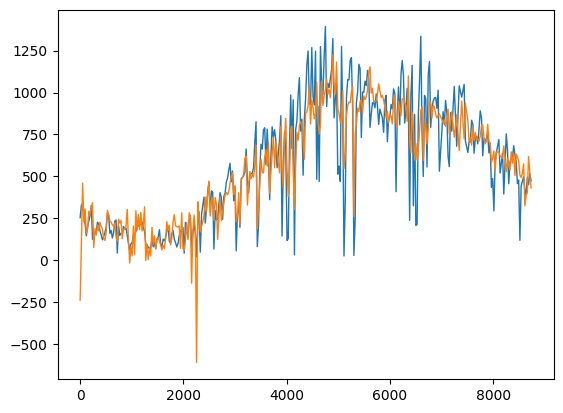

In [ ]:
plt.plot(gr_df["Rented Bike Count"], linewidth = 1)
plt.plot(predictions, linewidth = 1);

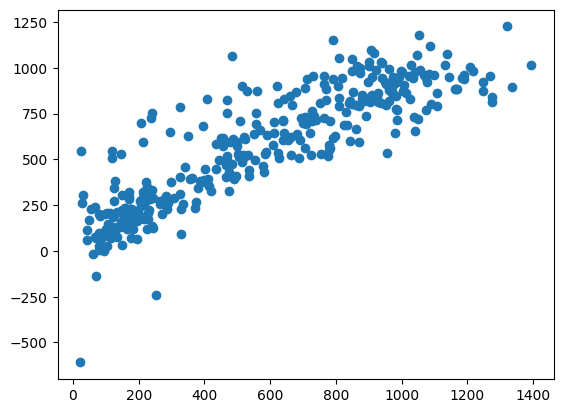

In [ ]:
plt.scatter(gr_df["Rented Bike Count"], predictions)

## Hour 17

ADF Statistic: -8.456305
p-value: 0.000000
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


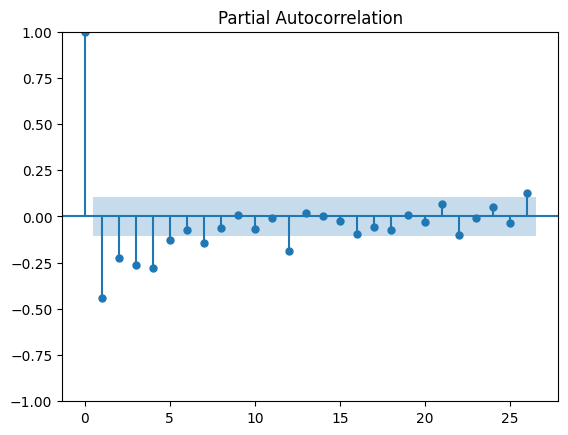

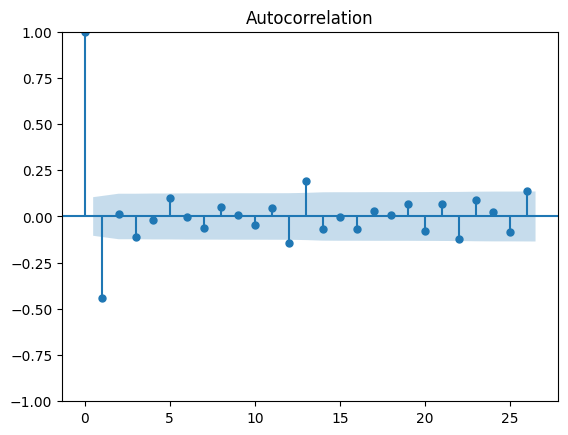

In [ ]:
h = 17
gr_df = grouped_data.get_group(h)
result = adfuller(gr_df["Rented Bike Count"].diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))
plot_pacf(gr_df["Rented Bike Count"].diff().dropna());
plot_acf(gr_df["Rented Bike Count"].diff().dropna());

In [ ]:
exog_v_choice = ['Temperature(°C)', 'Humidity(%)',
       'Solar Radiation (MJ/m2)',
       'Rainfall(mm)']
exog_vs[h] = exog_v_choice
exog_v = gr_df[exog_v_choice]

# Create the ARMAX model
model = sm.tsa.arima.ARIMA(gr_df['Rented Bike Count'],
                            exog = exog_v,
                            order=(7, 1, 2))

# Fit the model to the training data
results = model.fit()
print(results.summary())
models[h] = results
print("\n")
predictions = results.predict(start = 0, exog=exog_v)
print(((gr_df['Rented Bike Count'] - predictions) ** 2).mean())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                  353
Model:                 ARIMA(7, 1, 2)   Log Likelihood               -2494.324
Date:                Thu, 06 Apr 2023   AIC                           5016.648
Time:                        15:38:21   BIC                           5070.739
Sample:                             0   HQIC                          5038.174
                                - 353                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Temperature(°C)            36.2568      5.984      6.059      0.000      24.528      47.986
Humidity(%)                -9.2644      1.250     -7.414      0.000     -11.713      -6.815


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


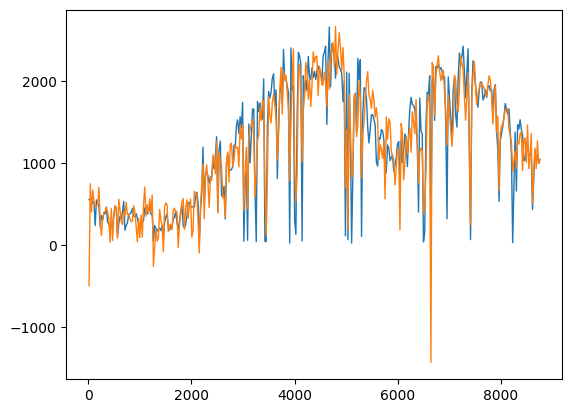

In [ ]:
plt.plot(gr_df["Rented Bike Count"], linewidth = 1)
plt.plot(predictions, linewidth = 1);

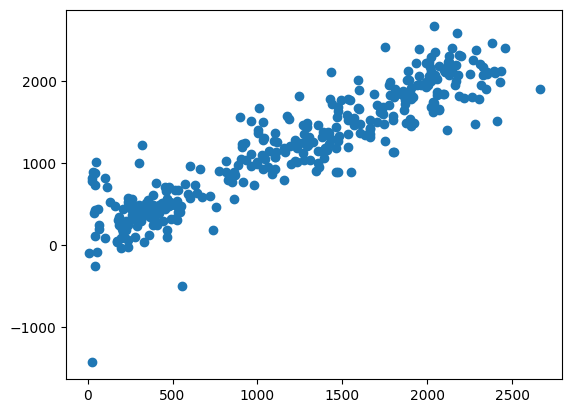

In [ ]:
plt.scatter(gr_df["Rented Bike Count"], predictions)

## Hour 18

ADF Statistic: -7.175001
p-value: 0.000000
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


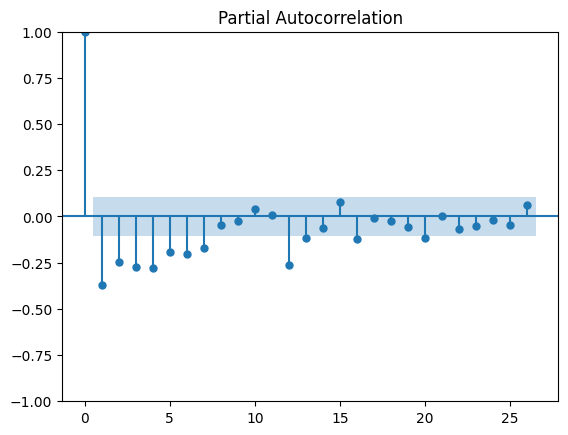

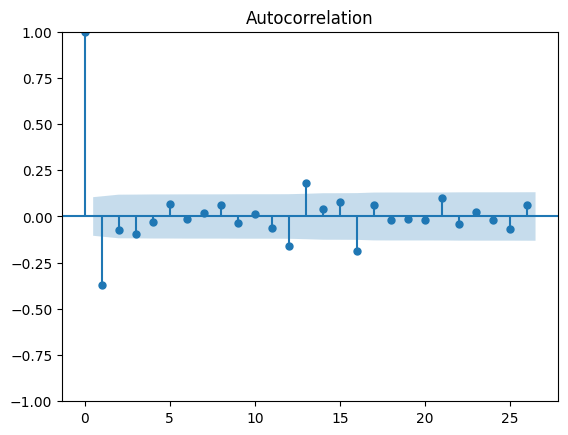

In [ ]:
h = 18
gr_df = grouped_data.get_group(h)
result = adfuller(gr_df["Rented Bike Count"].diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))
plot_pacf(gr_df["Rented Bike Count"].diff().dropna());
plot_acf(gr_df["Rented Bike Count"].diff().dropna());

In [ ]:
exog_v_choice = ['Temperature(°C)', 'Humidity(%)',
       'Solar Radiation (MJ/m2)',
       'Rainfall(mm)']
exog_vs[h] = exog_v_choice
exog_v = gr_df[exog_v_choice]

# Create the ARMAX model
model = sm.tsa.arima.ARIMA(gr_df['Rented Bike Count'],
                            exog = exog_v,
                            order=(3, 1, 2))

# Fit the model to the training data
results = model.fit()
print(results.summary())
models[h] = results
print("\n")
predictions = results.predict(start = 0, exog=exog_v)
print(((gr_df['Rented Bike Count'] - predictions) ** 2).mean())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                  353
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -2708.964
Date:                Thu, 06 Apr 2023   AIC                           5437.927
Time:                        15:44:40   BIC                           5476.564
Sample:                             0   HQIC                          5453.303
                                - 353                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Temperature(°C)            47.2845      9.240      5.117      0.000      29.174      65.395
Humidity(%)               -11.2556      2.116     -5.319      0.000     -15.403      -7.108


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


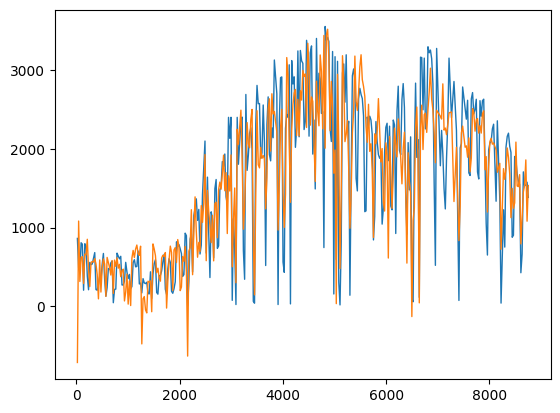

In [ ]:
plt.plot(gr_df["Rented Bike Count"], linewidth = 1)
plt.plot(predictions, linewidth = 1);

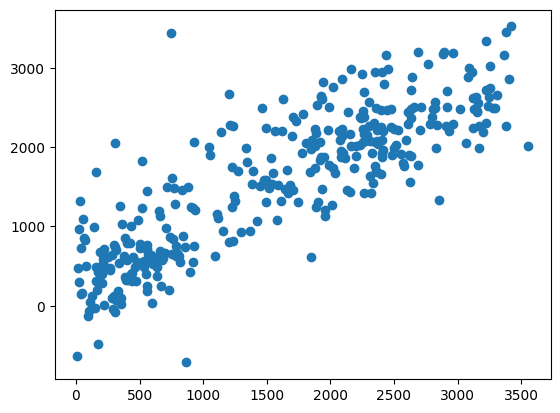

In [ ]:
plt.scatter(gr_df["Rented Bike Count"], predictions)

## Hour 19

ADF Statistic: -9.009288
p-value: 0.000000
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


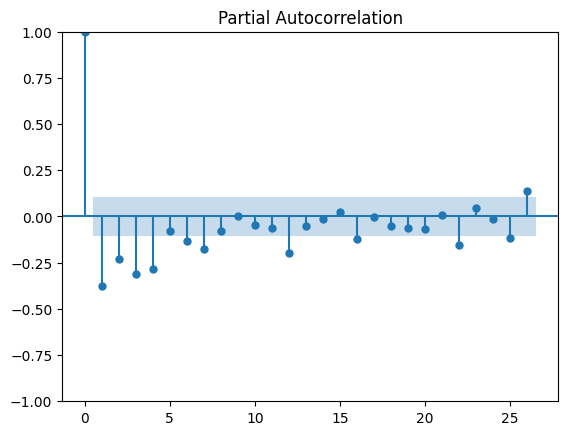

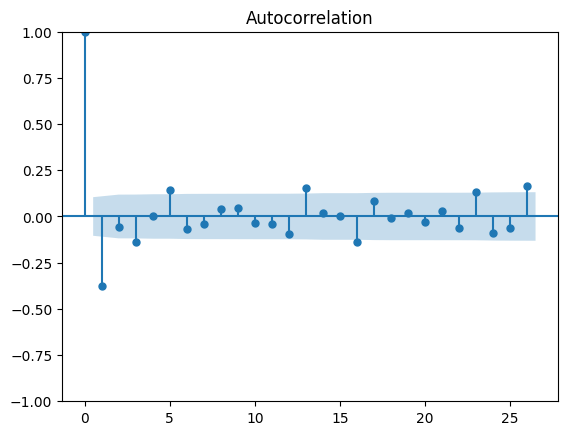

In [ ]:
h = 19
gr_df = grouped_data.get_group(h)
result = adfuller(gr_df["Rented Bike Count"].diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))
plot_pacf(gr_df["Rented Bike Count"].diff().dropna());
plot_acf(gr_df["Rented Bike Count"].diff().dropna());

In [ ]:
exog_v_choice = ['Temperature(°C)', 'Humidity(%)',
       'Solar Radiation (MJ/m2)',
       'Rainfall(mm)']
exog_vs[h] = exog_v_choice
exog_v = gr_df[exog_v_choice]

# Create the ARMAX model
model = sm.tsa.arima.ARIMA(gr_df['Rented Bike Count'],
                            exog = exog_v,
                            order=(2, 1, 2))

# Fit the model to the training data
results = model.fit()
print(results.summary())
models[h] = results
print("\n")
predictions = results.predict(start = 0, exog=exog_v)
print(((gr_df['Rented Bike Count'] - predictions) ** 2).mean())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zero

                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                  353
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2586.212
Date:                Thu, 06 Apr 2023   AIC                           5190.425
Time:                        15:49:51   BIC                           5225.198
Sample:                             0   HQIC                          5204.263
                                - 353                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Temperature(°C)            29.2317      7.088      4.124      0.000      15.340      43.123
Humidity(%)                -8.3685      1.392     -6.013      0.000     -11.096      -5.641


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


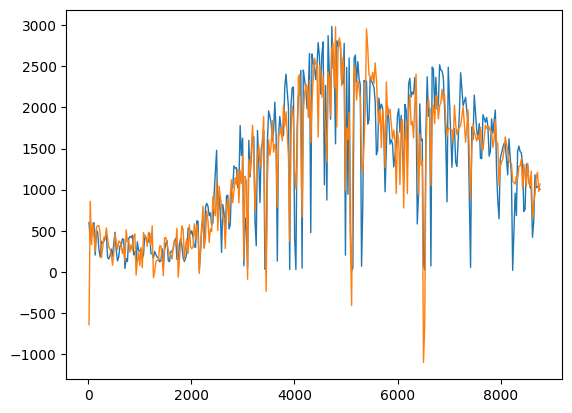

In [ ]:
plt.plot(gr_df["Rented Bike Count"], linewidth = 1)
plt.plot(predictions, linewidth = 1);

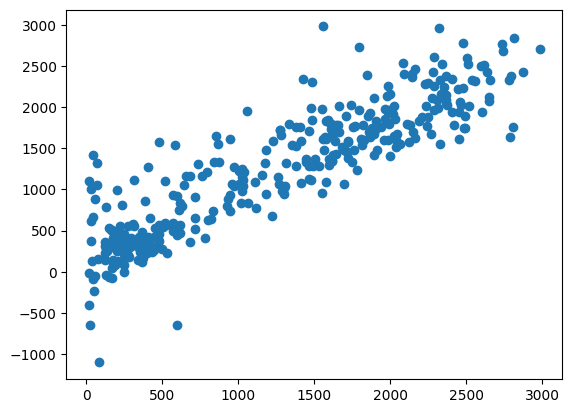

In [ ]:
plt.scatter(gr_df["Rented Bike Count"], predictions)

## Hour 20

ADF Statistic: -7.542685
p-value: 0.000000
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


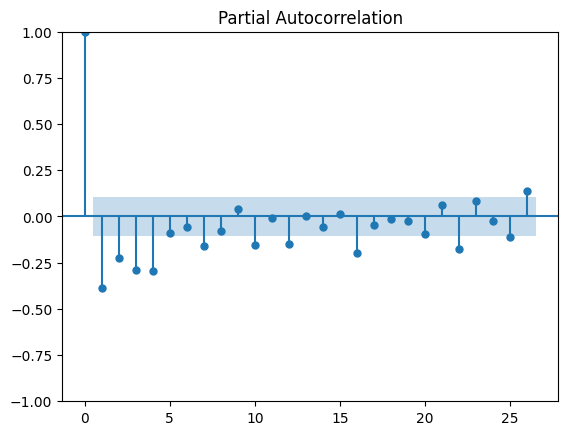

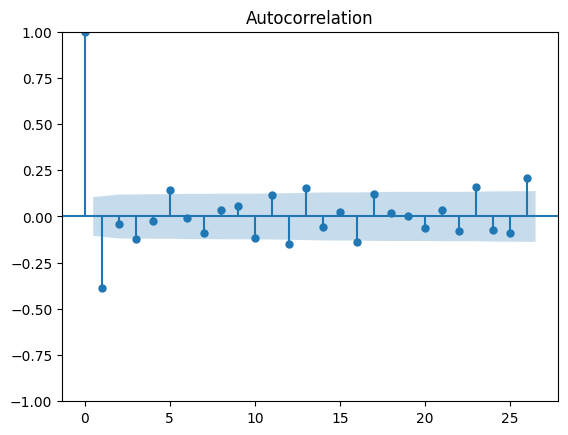

In [ ]:
h = 20
gr_df = grouped_data.get_group(h)
result = adfuller(gr_df["Rented Bike Count"].diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))
plot_pacf(gr_df["Rented Bike Count"].diff().dropna());
plot_acf(gr_df["Rented Bike Count"].diff().dropna());

In [ ]:
exog_v_choice = ['Temperature(°C)', 'Humidity(%)',
       'Solar Radiation (MJ/m2)',
       'Rainfall(mm)'
       ]
exog_vs[h] = exog_v_choice
exog_v = gr_df[exog_v_choice]

# Create the ARMAX model
model = sm.tsa.arima.ARIMA(gr_df['Rented Bike Count'],
                            exog = exog_v,
                            order=(0, 1, 1))

# Fit the model to the training data
results = model.fit()
print(results.summary())
models[h] = results
print("\n")
predictions = results.predict(start = 0, exog=exog_v)
print(((gr_df['Rented Bike Count'] - predictions) ** 2).mean())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                  353
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -2539.290
Date:                Thu, 06 Apr 2023   AIC                           5090.579
Time:                        16:02:43   BIC                           5113.761
Sample:                             0   HQIC                          5099.805
                                - 353                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Temperature(°C)            36.8015      5.355      6.872      0.000      26.305      47.298
Humidity(%)               -10.8874      1.014    -10.737      0.000     -12.875      -8.900


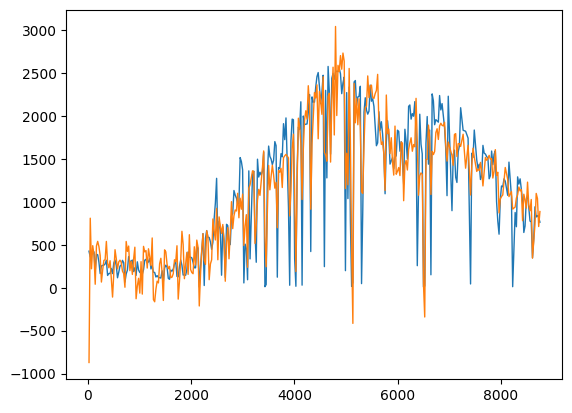

In [ ]:
plt.plot(gr_df["Rented Bike Count"], linewidth = 1)
plt.plot(predictions, linewidth = 1);

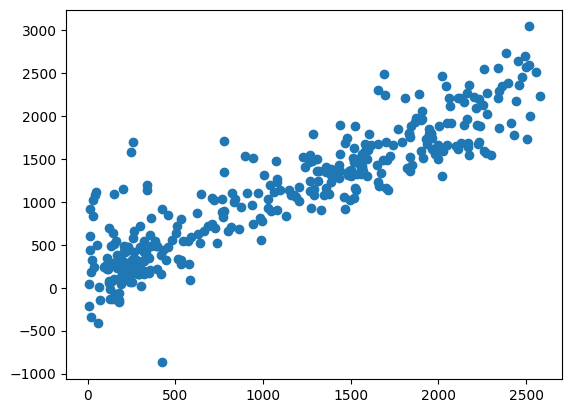

In [ ]:
plt.scatter(gr_df["Rented Bike Count"], predictions)

## Hour 21

ADF Statistic: -7.054450
p-value: 0.000000
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


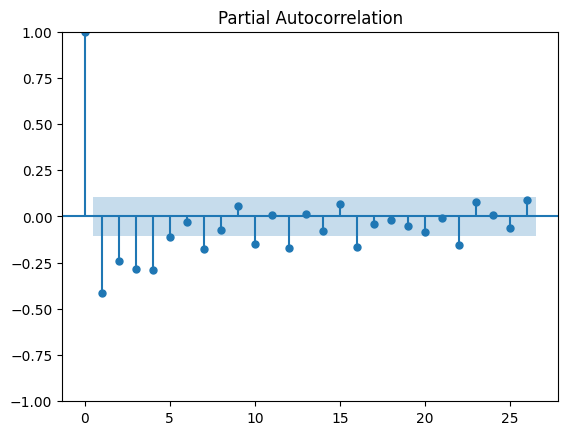

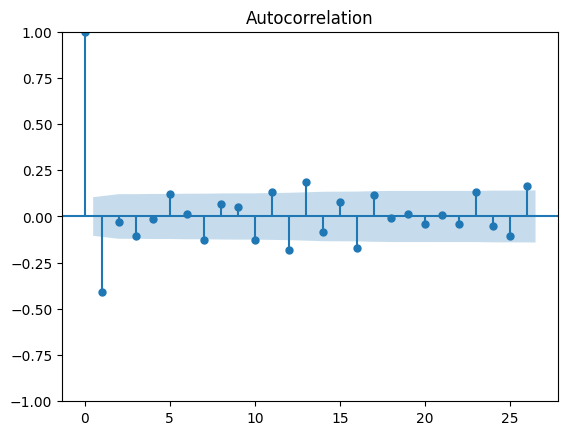

In [ ]:
h = 21
gr_df = grouped_data.get_group(h)
result = adfuller(gr_df["Rented Bike Count"].diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))
plot_pacf(gr_df["Rented Bike Count"].diff().dropna());
plot_acf(gr_df["Rented Bike Count"].diff().dropna());

In [ ]:
exog_v_choice = ['Temperature(°C)', 'Humidity(%)',
       'Visibility (10m)',
       'Rainfall(mm)']
exog_vs[h] = exog_v_choice
exog_v = gr_df[exog_v_choice]

# Create the ARMAX model
model = sm.tsa.arima.ARIMA(gr_df['Rented Bike Count'],
                            exog = exog_v,
                            order=(1, 1, 1))

# Fit the model to the training data
results = model.fit()
print(results.summary())
models[h] = results
print("\n")
predictions = results.predict(start = 0, exog=exog_v)
print(((gr_df['Rented Bike Count'] - predictions) ** 2).mean())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                  353
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2566.921
Date:                Thu, 06 Apr 2023   AIC                           5147.842
Time:                        16:05:47   BIC                           5174.887
Sample:                             0   HQIC                          5158.605
                                - 353                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Temperature(°C)     41.6658      6.431      6.479      0.000      29.061      54.270
Humidity(%)         -9.5106      1.634     -5.822      0.000     -12.712      -6.309
Visibility (10m)     0.0704 

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


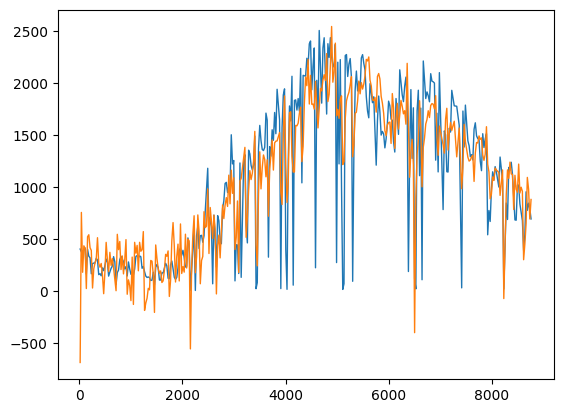

In [ ]:
plt.plot(gr_df["Rented Bike Count"], linewidth = 1)
plt.plot(predictions, linewidth = 1);

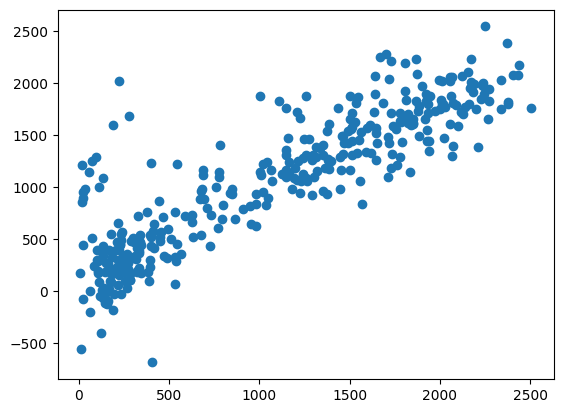

In [ ]:
plt.scatter(gr_df["Rented Bike Count"], predictions)

## Hour 22

ADF Statistic: -6.987403
p-value: 0.000000
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


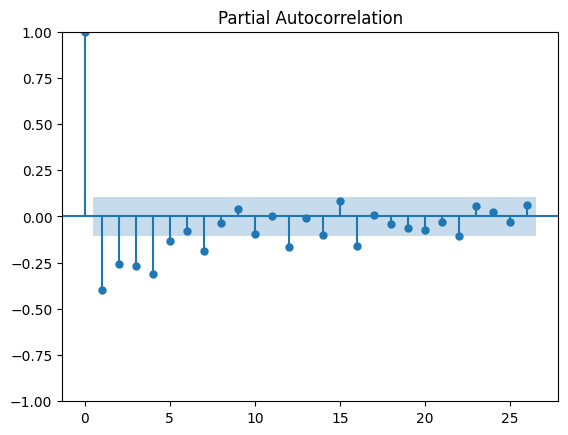

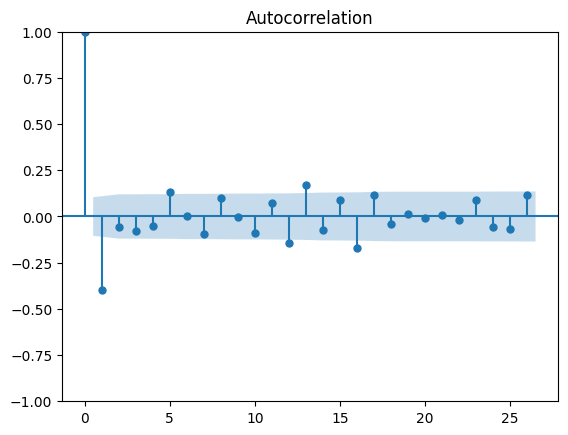

In [ ]:
h = 22
gr_df = grouped_data.get_group(h)
result = adfuller(gr_df["Rented Bike Count"].diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))
plot_pacf(gr_df["Rented Bike Count"].diff().dropna());
plot_acf(gr_df["Rented Bike Count"].diff().dropna());

In [ ]:
exog_v_choice = ['Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)',
       'Rainfall(mm)']
exog_vs[h] = exog_v_choice
exog_v = gr_df[exog_v_choice]

# Create the ARMAX model
model = sm.tsa.arima.ARIMA(gr_df['Rented Bike Count'],
                            exog = exog_v,
                            order=(5, 1, 1))

# Fit the model to the training data
results = model.fit()
print(results.summary())
models[h] = results
print("\n")
predictions = results.predict(start = 0, exog=exog_v)
print(((gr_df['Rented Bike Count'] - predictions) ** 2).mean())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                  353
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -2480.190
Date:                Thu, 06 Apr 2023   AIC                           4982.380
Time:                        16:11:20   BIC                           5024.880
Sample:                             0   HQIC                          4999.293
                                - 353                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Temperature(°C)     32.3908      4.701      6.890      0.000      23.177      41.605
Humidity(%)         -9.0792      0.885    -10.254      0.000     -10.815      -7.344
Wind speed (m/s)   -34.1719 

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print(mses[h])

90313.95167381217


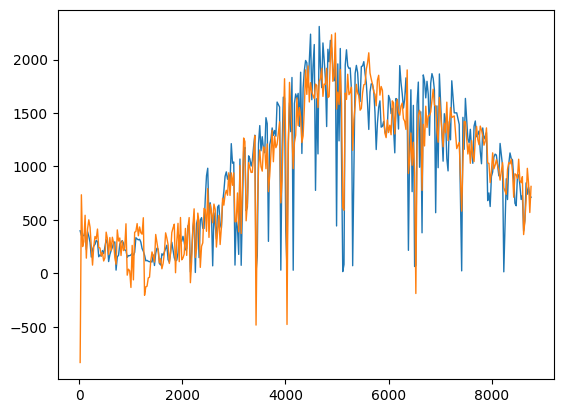

In [ ]:
plt.plot(gr_df["Rented Bike Count"], linewidth = 1)
plt.plot(predictions, linewidth = 1);

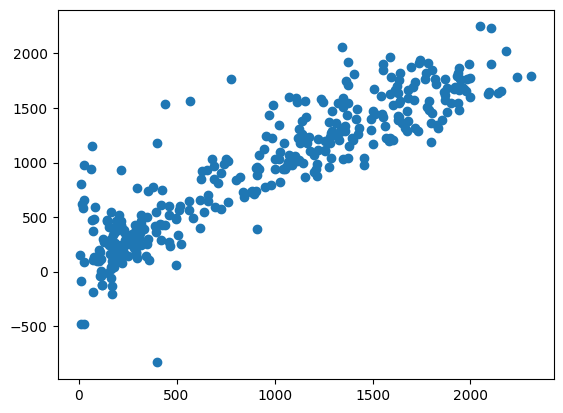

In [ ]:
plt.scatter(gr_df["Rented Bike Count"], predictions)

## Hour 23

ADF Statistic: -8.560055
p-value: 0.000000
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


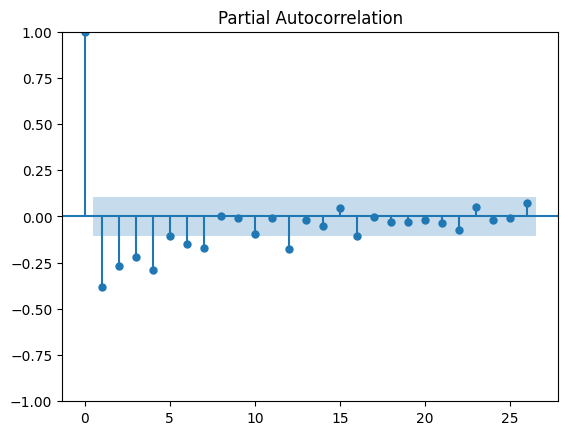

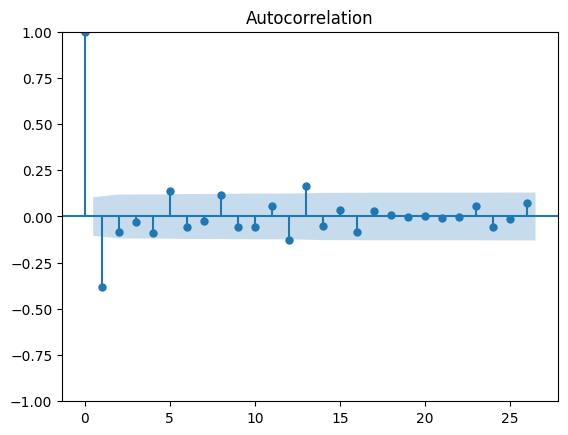

In [ ]:
h = 23
gr_df = grouped_data.get_group(h)
result = adfuller(gr_df["Rented Bike Count"].diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))
plot_pacf(gr_df["Rented Bike Count"].diff().dropna());
plot_acf(gr_df["Rented Bike Count"].diff().dropna());

In [ ]:
exog_v_choice = ['Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)',
       'Rainfall(mm)']
exog_vs[h] = exog_v_choice
exog_v = gr_df[exog_v_choice]

# Create the ARMAX model
model = sm.tsa.arima.ARIMA(gr_df['Rented Bike Count'],
                            exog = exog_v,
                            order=(1, 1, 1))

# Fit the model to the training data
results = model.fit()
print(results.summary())
models[h] = results
print("\n")
predictions = results.predict(start = 0, exog=exog_v)
print(((gr_df['Rented Bike Count'] - predictions) ** 2).mean())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                  353
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2360.101
Date:                Thu, 06 Apr 2023   AIC                           4734.202
Time:                        16:13:36   BIC                           4761.247
Sample:                             0   HQIC                          4744.965
                                - 353                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Temperature(°C)     18.6850      3.651      5.118      0.000      11.530      25.840
Humidity(%)         -5.4572      0.736     -7.411      0.000      -6.900      -4.014
Wind speed (m/s)   -23.0749 

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


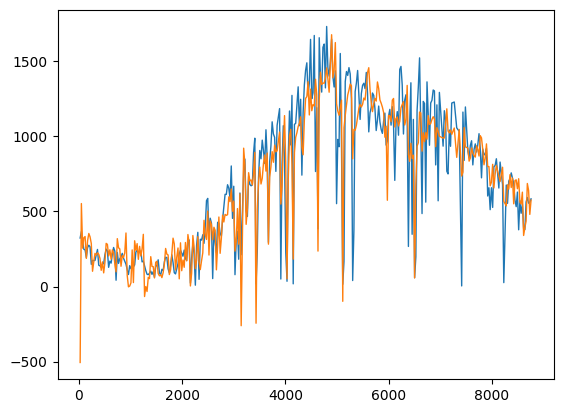

In [ ]:
plt.plot(gr_df["Rented Bike Count"], linewidth = 1)
plt.plot(predictions, linewidth = 1);

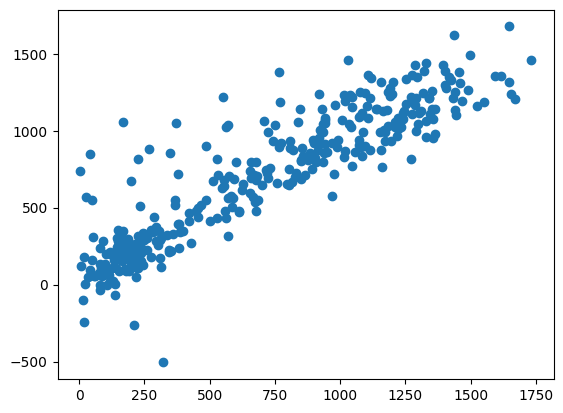

In [ ]:
plt.scatter(gr_df["Rented Bike Count"], predictions)

## Total prediction

In [ ]:
count = [0] * 24
predictions = list()
for i in range(8760):
  if seoulbike.loc[i, "Functioning Day"] == "Yes":
    h = seoulbike.loc[i, "Hour"]
    c = count[h]
    prediction = models[h].predict(c, c).values[0]
    count[h] += 1
    if prediction >= 0:
      predictions.append(prediction)
    else:
      predictions.append(0)
  else:
    predictions.append(0)
mse = ((predictions - seoulbike.loc[:, "Rented Bike Count"]) ** 2).mean()
print(f'Mean squared error: {mse}')

Mean squared error: 67160.91950099103


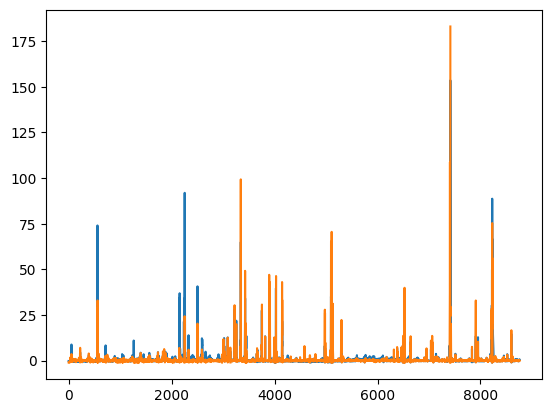

In [ ]:
pos_residual = (poisson_prediction - seoulbike_adj.loc[:, "Rented Bike Count"])/seoulbike_adj.loc[:, "Rented Bike Count"]
plt.plot(pos_residual)
residual = (predictions - seoulbike.loc[:, "Rented Bike Count"])/seoulbike.loc[:, "Rented Bike Count"]
plt.plot(residual)

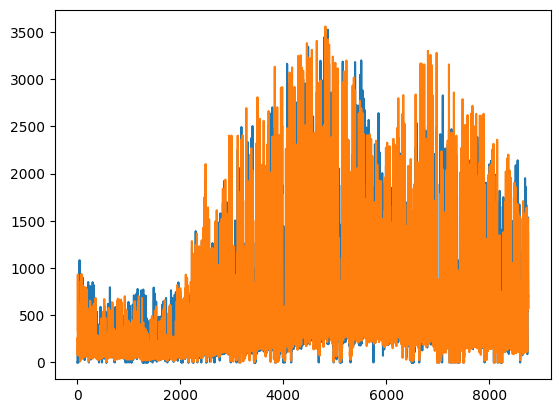

In [ ]:
plt.plot(predictions)
plt.plot(seoulbike.loc[:, "Rented Bike Count"])

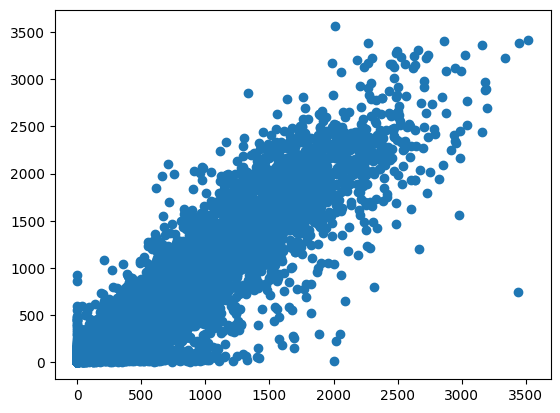

In [ ]:
plt.scatter(predictions, seoulbike.loc[:, "Rented Bike Count"])